# Final Project Submission

- Student Name: Keith Byron Otuomagie
- Student pace: self-paced
- Scheduled project review date/time: Thursday, June 19th, 2025 / 11:00 AM (EST)
- Instructor name: Mark Barbour
- Blog post URL: https://medium.com/@otuomagie/the-final-is-here-799748b0fb4d

# Business Problem

A financial services company wants to expand its business portfolio by entering the credit card business.  The company executives also recognize that fraud is a paramount issue.  As a result, the firm tasks KBO Analytics with the following:

- Create a model prototype to detect credit card fraud
- Identify characteristics that signal whether or not credit card fraud will take place

# Data Understanding

The data for examing the aforementioned problem comes from the following source: [Credit Card Fraud Data](https://www.kaggle.com/datasets/neharoychoudhury/credit-card-fraud-data/data)

Before beginning to identify any trends with customers that churn, I want to examine and become familiar with the dataset. I will conduct exploratory data analysis in order to understand the dataset attributes, which includes, but not limited to the following:

1. Number of Columns
2. Number of Rows
3. Column Names
4. Format of the data in each column

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations
from datetime import datetime
import json 
import os
from pathlib import Path


from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


Before continuing with the Data Understanding stage, I want to provide the following steps and cells for downloading the dataset and running the code via Google Colab.  The steps and cells are the following:

1. Kaggle authentication
2. Download dataset
3. Unzip dataset
4. Transform dataset into Pandas dataframe

In [2]:
# # Google Colab
# # 1 - Kaggle Authentication

# # Reference the code in the link below to authenticate on Kaggle:
# # https://stackoverflow.com/questions/56816537/cant-find-kaggle-json-file-in-google-colab

# # your api key
# api_key = {       # (Uncomment)
# 'username':"" ,  # (Uncomment and insert your Kaggle username) 
# 'key':""}        # (Uncomment and insert your Kaggle api key)   

# # uses pathlib Path
# kaggle_path = Path('/root/.kaggle')   # (Uncomment)
# os.makedirs(kaggle_path, exist_ok=True)           # (Uncomment)

# # opens file and dumps python dict to json object 
# with open (kaggle_path/'kaggle.json', 'w') as handl:  # (Uncomment)
#     json.dump(api_key,handl)                          # (Uncomment) 

# os.chmod(kaggle_path/'kaggle.json', 600)              # (Uncomment)

In [3]:
# # Google Colab
# # 2 - Download dataset

# !kaggle datasets download -d neharoychoudhury/credit-card-fraud-data # (Uncomment)

In [4]:
# # Google Colab
# # 3 - Unzip dataset

# !unzip credit-card-fraud-data.zip -d data # (Uncomment)

In [5]:
# Google Colab
# 4 - Reading file

fraud_df = pd.read_csv("data/fraud_data.csv")  # (Uncomment)

In [6]:
# Examining initial 10 columns of the dataframe

fraud_df.head(10)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
5,05-01-2019 03:15,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,1
6,05-01-2019 03:21,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,1
7,05-01-2019 11:31,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,14-07-1954,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,1
8,05-01-2019 18:03,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,fba83e0a3adb530251295ab72a96b719,64.623325,-166.403973,1
9,05-01-2019 22:02,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,b87c92d4824758e704da572891697fed,65.266065,-164.865352,1


In [7]:
# Examining last 10 columns of the dataframe

fraud_df.tail(10)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
14436,22-01-2019 00:18,"""Connelly, Reichert and Fritsch""",gas_transport,93.23,Unionville,MO,40.4815,-92.9951,3805,"""Investment banker, corporate""",15-09-1950,58d980b2db4f0581aaa3e62967072efa,40.527285,-93.859674,0
14437,22-01-2019 00:19,"""Kuhic, Bins and Pfeffe""",shopping_net,4.65,Eugene,OR,44.0385,-123.0614,191096,"""Scientist, physiological""",06-04-1964,6f552aa7397e6e1c012c25ecfc0cc9b7,43.821635,-122.497236,0
14438,22-01-2019 00:23,Sporer Inc,gas_transport,51.57,Carlotta,CA,40.5070,-123.9743,1139,"""Therapist, occupational""",15-01-1951,c10ca0af6656b71e6da577da9db6c8c3,40.556556,-124.887658,0
14439,22-01-2019 00:32,"""Willms, Kris and Bergnaum""",shopping_pos,145.60,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,c206b545e52a142e1009fb0bd3e3f2ac,46.592719,-118.002289,0
14440,22-01-2019 00:37,Wiza LLC,misc_pos,37.92,Syracuse,MO,38.6547,-92.8929,628,"""Radiographer, diagnostic""",18-12-1961,a98a9e2ca6a7c605c34a4298be3ad606,39.245730,-92.441388,0
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0
14445,22-01-2019 00:55,Daugherty-Thompson,food_dining,50.09,Unionville,MO,40.4815,-92.9951,3805,"""Investment banker, corporate""",15-09-1950,65e7370f473f9b9d75796c8033a7c929,40.387243,-92.224871,0


In [8]:
# Examining the dataframe

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

I created a Pandas Dataframe.  The Dataframe contains 14,446 rows of data.  The Dataframe contains 15 columns, which are the following:
    
1. Transaction Date and Time - (*fraud_df['trans_date_trans_time']*)
2. Merchant Name - (*fraud_df['merchant']*)
3. Category of Merchant - (*fraud_df['category']*)
4. Amount of Transaction - (*fraud_df['amt']*)
5. City of Credit Card Holder - (*fraud_df['city']*)
6. State of Credit Card Holder - (*fraud_df['state']*)
7. Latitute Location of Purchase - (*fraud_df['lat']*)
8. Longitude Location of Purchase - (*fraud_df['long']*)
9. Credit Card Holder's City Population - (*fraud_df['city_pop']*)
10. Job of Credit Card Holder - (*fraud_df['job']*)
11. Date of Birth of Credit Card Holder - (*fraud_df['dob']*)
12. Transaction Number - (*fraud_df['trans_num']*)
13. Latitude of Location of Merchant - (*fraud_df['merch_lat']*)
14. Longitude Location of Merchant - (*fraud_df['merch_long']*)
15. Whether Transaction is Fraud or Not - (*fraud_df['is_fraud']*)   

## Missing Data

In [9]:
# Examining missing values in each column

fraud_df.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

I utilized the following code - *fraud_df.isna().sum()* - to check for missing values in each column.  There are no missing values in any of the columns.

## Duplicate Data

In [10]:
# Examining dataframe for duplicate data

fraud_df.duplicated().sum()

63

In [11]:
# Creating a dataframe for duplicates

duplicates_all = fraud_df[fraud_df.duplicated(keep=False)]

In [12]:
# Examining the first 20 rows of the duplicates dataframe

duplicates_all.head(20)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
5,05-01-2019 03:15,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,1
6,05-01-2019 03:21,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,1
7,05-01-2019 11:31,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,14-07-1954,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,1
8,05-01-2019 18:03,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,fba83e0a3adb530251295ab72a96b719,64.623325,-166.403973,1
9,05-01-2019 22:02,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,b87c92d4824758e704da572891697fed,65.266065,-164.865352,1


In [13]:
# Examining the last 20 rows of the duplicates dataframe

duplicates_all.tail(20)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
12092,14-01-2019 16:15,"""Baumbach, Hodkiewicz and Walsh""",shopping_pos,839.35,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,7f9497dfc82f973690fd20102c502210,42.337832,-99.342280,1
12222,14-01-2019 22:28,Beier-Hyatt,shopping_pos,969.64,San Jose,CA,37.3304,-121.7913,973849,Science writer,12-06-1955,163aa0609a5b81e3b3be72fb7bc31ed3,36.709536,-122.649175,1
12238,14-01-2019 23:17,"""Reichert, Huels and Hoppe""",shopping_net,1034.21,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,d861ecd9fb05ec1832e4168e31cda378,41.124870,-100.349332,1
12239,14-01-2019 23:18,"""Konopelski, Schneider and Hartmann""",food_dining,121.62,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,31001f18f1cc19cfde92209361884e06,40.544371,-98.726597,1
12274,15-01-2019 01:07,VonRueden Group,grocery_net,15.05,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,f3d6f1020342e0aec86a1483d85a52d4,42.015822,-98.943391,1
12643,15-01-2019 22:50,Koelpin and Sons,misc_net,851.71,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,22b7c01ff32367d1c58037196e9b6afb,40.461654,-98.987825,1
12647,15-01-2019 23:01,"""Little, Gutmann and Lynch""",shopping_net,1124.01,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,18754b81f40491fc7058342bf61eb82e,40.650720,-98.820629,1
12650,15-01-2019 23:12,"""Reichert, Shanahan and Hayes""",shopping_net,1140.41,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,7da32f9ad2d6aa478131b5f7fa51fee5,41.151133,-99.382380,1
12905,17-01-2019 01:30,"""Monahan, Bogisich and Ledne""",misc_pos,795.59,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,5d6931d4ac32d177b708ed9785d409ea,38.278335,-109.044284,1
12962,17-01-2019 08:59,Kutch LLC,gas_transport,9.79,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,73d976fc46f089af2c58c39273525b55,39.157345,-109.126592,1


I utilized the following code - *fraud_df.duplicated().sum()* - to understand how many duplicated rows are in the dataframe.  There is a total of 63 duplicate rows.

## Examining Columns

I am going to conduct additional exploratory analysis for the following columns:
    
- Whether Transaction is Fraud or Not
- Merchant Name
- Category of Merchant
- City of Credit Card Holder
- State of Credit Card Holder
- Job of Credit Card Holder
- Date of Birth of Credit Card Holder
- Transaction Number

The following column - Whether Transaction is Fraud or Not - is the target.  This is the column that captures the non-fradulent and fradulent transactions.

The remaining columns are categorical.  I want to examine the distribution of the data within each column.

### Whether Transaction is Fraud or Not

In [14]:
# Examining how many values of fraud are in the following column: 'is_fraud'

fraud_df['is_fraud'].value_counts()

0                         12600
1                          1844
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: is_fraud, dtype: int64

**Observations | Whether Transaction is Fraud or Not**    

I utilized the following code - *fraud_df['is_fraud'].value_counts()* - to understand how many cases of fraud exist within the dataframe.

There 12,600 cases of no fraud.  There are 1,844 cases of fraud.  As expected, there is a class imbalance of fraud within the dataset.  In regards to modeling, accuracy will not be an appropriate metric to determine model performance.

I want to note there is a row with the following entry - *0"2019-01-01 00:00:44"*.  I am assuming this is a non-fradulent case in which the transaction date and time was incorporated.  I will remove the timestamp during the data cleaning phase.

I also want to note there is a row with the following entry - *1"2020-12-24 16:56:24"*.  I am assuming this is a fradulent case in which the transaction date and time was incorporated.  I will remove the timestamp during the data cleaning phase.

A bar chart that breaks down the non-fradulent and fradulent cases is below.

Text(0.5, 1.0, 'Breakdown of Fraud Cases')

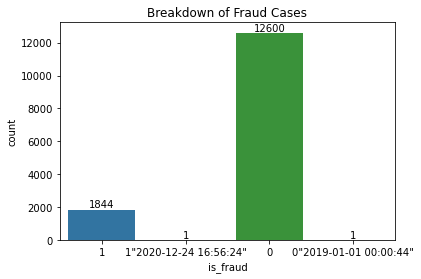

In [15]:
# Create a bar chart for Value Counts of the 'is_fraud' column

ax = sns.countplot(x='is_fraud', data=fraud_df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Fraud Cases")

### Merchant Name

In [16]:
# Examining the number of unique categories in the 'merchant' column

fraud_df['merchant'].nunique()

693

In [17]:
# Examining the value counts for each unique category in the 'merchant' column

fraud_df['merchant'].value_counts()

Kilback LLC                       58
Cormier LLC                       48
Kutch and Sons                    46
Rau and Sons                      44
McDermott-Weimann                 42
                                  ..
"Hagenes, Hermann and Stroman"     4
Collier Inc                        4
"Ferry, Reichel and DuBuque"       4
Lemke and Sons                     4
Kovacek Lt                         3
Name: merchant, Length: 693, dtype: int64

In [18]:
# Examining the value counts for the top 30 categories in the 'merchant' column

fraud_df['merchant'].value_counts()[0:30]

Kilback LLC                               58
Cormier LLC                               48
Kutch and Sons                            46
Rau and Sons                              44
McDermott-Weimann                         42
Kiehn-Emmerich                            42
Boyer PLC                                 41
Emard Inc                                 40
Kutch-Wilderman                           39
Kuhn LLC                                  39
Murray-Smitham                            39
"Osinski, Ledner and Leuschke"            38
Dickinson Lt                              38
Hudson-Grady                              38
Gerhold LLC                               38
Stark-Koss                                38
"Romaguera, Cruickshank and Greenholt"    37
"Baumbach, Strosin and Nicolas"           37
Doyle Lt                                  37
Padberg-Welch                             37
Hudson-Ratke                              37
Torp-Labadie                              37
Boyer-Reic

**Observations | Merchant Name**    

I utilized the following code - *fraud_df['merchant'].nunique()* - to identify the number of unique values in the Merchant column.  There are 693 different values in the Merchant column.  

I utilized the following code - fraud_df['merchant'].value_counts() - to understand the distribution of the categories within the Merchant column.  The top 5 values with their respective counts are the following:
    
- Kilback LLC - 58
- Cormier LLC - 48
- Kutch and Sons - 46
- Rau and Sons - 44
- Kiehn-Emmerich - 42
    
Based on the observations, there is a high degree of cardinality, or many unique values, within the Merchant column.
    
I utilized the following code - *fraud_df['merchant'].value_counts().plot()* - to provide a visualization of the high cardinality, which is below.

<AxesSubplot:>

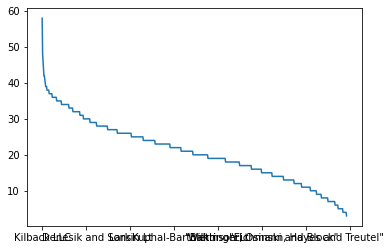

In [19]:
# Visualization of the cardinality of the 'Merchant' column

fraud_df['merchant'].value_counts().plot()

### Category (of Merchant)

In [20]:
# Examining the number of unique categories in the 'category' column

fraud_df['category'].nunique()

14

In [21]:
# Examining the value counts for each unique category in the 'category' column

fraud_df['category'].value_counts()

grocery_pos       1602
gas_transport     1430
shopping_net      1408
shopping_pos      1354
home              1304
kids_pets         1141
personal_care      990
entertainment      953
health_fitness     891
food_dining        870
misc_pos           823
misc_net           821
grocery_net        474
travel             385
Name: category, dtype: int64

**Observations | Category (of Merchant)** 

I utilized the following code - *fraud_df['category'].nunique()* - to identify the number of unique values in the Category column.  There are 14 different values in the Category column.  

I utilized the following code - fraud_df['category'].value_counts() - to understand the distribution of the values within the Category column.  The top 5 values with their respective counts are the following:
    
- *grocery_pos* - 1602
- *gas_transport* - 1430
- *shopping_net* - 1408
- *shopping_pos* - 1354
- *home* - 1304
    
Based on the observations, there is a low degree of cardinality, or few unique values, within the Category column.
    
I utilized the following code - *fraud_df['category'].value_counts().plot()* - to provide a visualization of the low cardinality, which is below.

<AxesSubplot:>

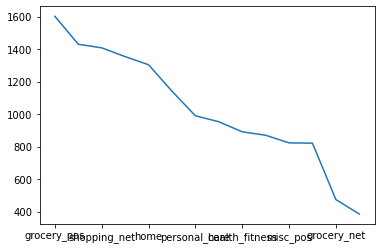

In [22]:
# Visualization of the cardinality of the 'Category' column

fraud_df['category'].value_counts().plot()

In [23]:
# Creating a dataframe that only has the fradulent transactions

all_fraud_cases = fraud_df[fraud_df['is_fraud'] == '1']

In [24]:
# Examining the values counts of the Category column within the new dataframe - 'all_fraud_cases'

all_fraud_cases['category'].value_counts()

grocery_pos       444
shopping_net      396
misc_net          223
shopping_pos      194
gas_transport     159
misc_pos           64
entertainment      59
personal_care      57
kids_pets          56
home               51
food_dining        39
health_fitness     36
travel             34
grocery_net        32
Name: category, dtype: int64

I created a dataframe that only has the fradulent credit card transactions.  The top five merchant values that have fradulent transactionss are the following:

- *grocery_pos* - 444
- *shopping_net* - 396
- *misc_net* - 223
- *shopping_pos* - 194
- *gas_transport* - 159

Upon observing the data, I see there are opportunities to group some of the merchant values together.  For example, *food_dining* category can become part of the *entertainment* category.

I also created a bar chart to represent which merchant values have the most fradulent cases.  The bar chart is below.

Text(0.5, 1.0, 'Breakdown of Fraud Cases for each Merchant')

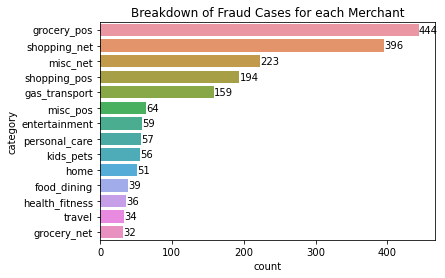

In [25]:
# Get the sorted index of categories based on their counts
sorted_categories = all_fraud_cases['category'].value_counts().index

# Creating the bar chart
ax = sns.countplot(y='category', data=all_fraud_cases, order=sorted_categories)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Fraud Cases for each Merchant")

### City of Credit Card Holder

In [26]:
# Examining the number of unique categories in the 'city' column

fraud_df['city'].nunique()

176

In [27]:
# Examining the value counts for each unique category in the 'city' column

fraud_df['city'].value_counts()

Phoenix          297
Centerview       197
Orient           192
Sutherland       187
Fort Washakie    187
                ... 
Kirtland          10
Pleasant Hill      8
Wappapello         8
Buellton           8
Vacaville          7
Name: city, Length: 176, dtype: int64

**Observations | City of Credit Card Holder** 

I utilized the following code - *fraud_df['city'].nunique()* - to identify the number of unique values in the City column.  There are 176 different values in the City column.  

I utilized the following code - fraud_df['city'].value_counts() - to understand the distribution of the values within the City column.  The top 5 values with their respective counts are the following:
    
- Phoenix - 297
- Centerview - 197
- Orient - 192
- Sutherland - 187
- Fort Washakie - 187
    
Based on the observations, there is a high degree of cardinality, or many unique values, within the City column.
    
I utilized the following code - *fraud_df['city'].value_counts().plot()* - to provide a visualization of the high cardinality, which is below.

<AxesSubplot:>

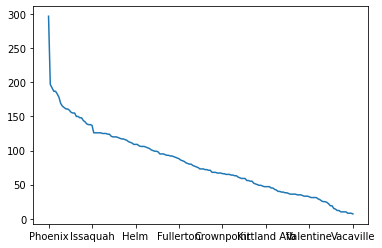

In [28]:
# Visualization of the cardinality of the 'City' column

fraud_df['city'].value_counts().plot()

### State of Credit Card Holder

In [29]:
# Examining the number of unique categories in the 'state' column

fraud_df['state'].nunique()

13

In [30]:
# Examining the value counts for each unique category in the 'state' column

fraud_df['state'].value_counts()

CA    3375
MO    2329
NE    1460
OR    1211
WA    1150
WY    1100
NM    1003
CO     856
AZ     673
UT     597
ID     347
AK     173
HI     172
Name: state, dtype: int64

**Observations | State of Credit Card Holder** 

I utilized the following code - *fraud_df['state'].nunique()* - to identify the number of unique values in the State column.  There are 13 different values in the State column.  

I utilized the following code - fraud_df['state'].value_counts() - to understand the distribution of the values within the State column.  The top 5 values with their respective counts are the following:
    
- CA - 3375
- MO - 2329
- NE - 1460
- OR - 1211
- WA - 1150
    
Based on the observations, there is a low degree of cardinality, or few unique values, within the State column.
    
I utilized the following code - *fraud_df['state'].value_counts().plot()* - to provide a visualization of the low cardinality, which is below.

<AxesSubplot:>

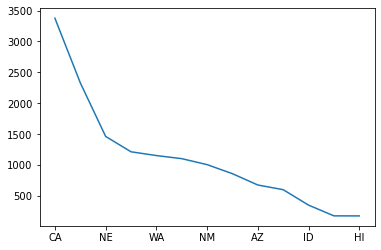

In [31]:
# Visualization of the cardinality of the 'State' column

fraud_df['state'].value_counts().plot()

In [32]:
# Examining the values counts of the State column within the new dataframe - 'all_fraud_cases'

all_fraud_cases['state'].value_counts()

CA    410
MO    267
NE    238
OR    197
WA    126
NM    121
WY    119
CO    115
UT     73
AK     65
AZ     64
ID     33
HI     16
Name: state, dtype: int64

I leveraged the dataframe that only has the fradulent credit card transactions.  The top five states that have fradulent transactionss are the following:

- CA - 410
- MO - 267
- NE - 238
- OR - 197
- WA - 126

Upon observing the data, I see there are opportunities to group some of the states together.  For example, I can group the states into the following categories: West, Southwest, and Midwest.  However, I am inclined to maintain California (CA), Alaska (AK), and HI (Hawaii) as standalone states.

I also created a bar chart to represent which states have the most fradulent cases.  The bar chart is below.

Text(0.5, 1.0, 'Breakdown of Fraud Cases by State')

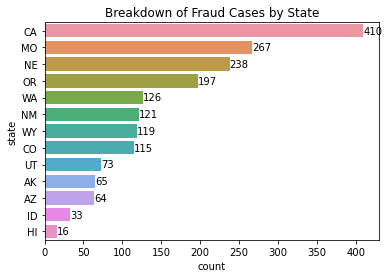

In [33]:
# Get the sorted index of states based on their counts
sorted_states = all_fraud_cases['state'].value_counts().index

# Creating the bar chart
ax = sns.countplot(y='state', data=all_fraud_cases, order=sorted_states)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Fraud Cases by State")

### Job of Credit Card Holder

In [34]:
# Examining the number of unique categories in the 'job' column

fraud_df['job'].nunique()

163

In [35]:
# Examining the value counts for each unique category in the 'job' column

fraud_df['job'].value_counts()

"Surveyor, minerals"            262
"Surveyor, land/geomatics"      240
Land/geomatics surveyor         225
Insurance broker                209
Electronics engineer            197
                               ... 
Systems developer                 9
Landscape architect               9
Information officer               8
Research scientist (medical)      8
Clinical cytogeneticist           7
Name: job, Length: 163, dtype: int64

**Observations | Job of Credit Card Holder** 

I utilized the following code - *fraud_df['job'].nunique()* - to identify the number of unique values in the Job column.  There are 163 different categories in the Job column.  

I utilized the following code - fraud_df['job'].value_counts() - to understand the distribution of the values within the Job column.  The top 5 values with their respective counts are the following:
    
- Surveyor, minerals - 262
- Surveyor, land/geomatics - 240
- Land/geomatics surveyor - 225
- Insurance broker - 209
- Electronics engineer - 197
    
Based on the observations, there is a high degree of cardinality, or many unique values, within the Job column.
    
I utilized the following code - *fraud_df['job'].value_counts().plot()* - to provide a visualization of the high cardinality, which is below.

<AxesSubplot:>

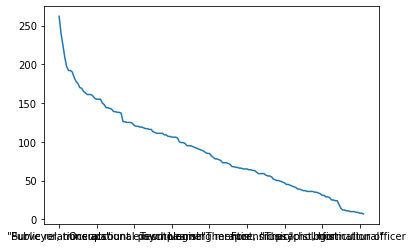

In [36]:
# Visualization of the cardinality of the 'Job' column

fraud_df['job'].value_counts().plot()

### Date of Birth of Credit Card Holder

In [37]:
# Examining the number of unique categories in the 'dob' column

fraud_df['dob'].nunique()

187

In [38]:
# Examining the value counts for each unique category in the 'dob' column

fraud_df['dob'].value_counts()

17-07-1989    197
21-06-1978    192
24-10-1981    190
11-02-1982    187
28-10-1987    183
             ... 
08-11-1940      9
27-07-1957      8
10-08-1932      8
28-05-1946      8
25-06-1970      7
Name: dob, Length: 187, dtype: int64

I utilized the following code - *fraud_df['dob'].nunique()* - to identify the number of unique values in the Date of Birth column.  There are 187 different values in the Date of Birth column.  

I utilized the following code - fraud_df['dob'].value_counts() - to understand the distribution of the categories within the Date of Birth column.  The top 5 values with their respective counts are the following:
    
- July 17th, 1989 - 197
- June 21st, 1978 - 192
- October 24th, 1981 - 190
- February 11th, 1982 - 187
- October 28th, 1987 - 183
    
Based on the observations, there is a high degree of cardinality, or many unique values, within the Date of Birth column.
    
I utilized the following code - *fraud_df['dob'].value_counts().plot()* - to provide a visualization of the high cardinality, which is below.

<AxesSubplot:>

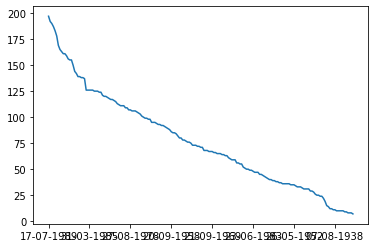

In [39]:
fraud_df['dob'].value_counts().plot()

### Transaction Number

In [40]:
# Examining the number of unique categories in the 'transaction number' column

fraud_df['trans_num'].nunique()

14383

In [41]:
# Examining the value counts for each unique category in the 'transaction number' column

fraud_df['trans_num'].value_counts()

82a79798b2e4c690d1e3c9526e8ae0ed    2
5900fb4411f88bda3f613fb8fa20f925    2
c50735baa9016d1707cd945c5926f687    2
f1edc60904bafa8aac00a0f5e9026d0c    2
fba83e0a3adb530251295ab72a96b719    2
                                   ..
f27711b1a540397e2d1510b3944dfbe4    1
4de503e34e71d8a25f119601ec379a19    1
63dac353a22364ff0b40f412e92bed97    1
c10a5a5008cd6b2f6b9fde7fc846babe    1
a85bee03396457e6c664a5e2d6414c7b    1
Name: trans_num, Length: 14383, dtype: int64

**Observations | Transaction Number** 

I utilized the following code - *fraud_df['trans_num'].nunique()* - to identify the number of unique values in the Transaction Number column.  There are 14383 different values in the Transaction Number column.  

I utilized the following code - *fraud_df['trans_num'].value_counts()* - to understand the distribution of the values within the Job column.
    
Based on the observations, this column has the highest degree of cardinality in comparison to all of the other columns in the dataset.  This is expected.  A transaction number is a unique identifier that is specific for a singular transaction.  
    
I utilized the following code - *fraud_df['trans_num'].value_counts().plot()* - to provide a visualization of the high cardinality, which is below.

<AxesSubplot:>

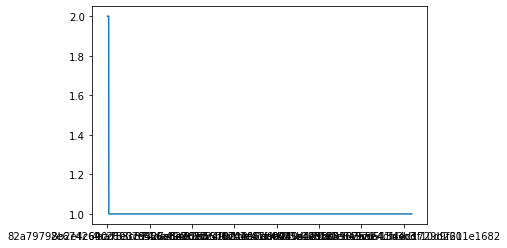

In [42]:
fraud_df['trans_num'].value_counts().plot()

# Data Preparation

I have completed the Data Understanding stage.  I will transition to preparing the data for modeling via the following stages:

**Duplicate Data**
- Remove Duplicates

**Columns to Drop**
- Remove the Merchant column, or *fraud_df['merchant']*
- Remove the City of Credit Card Holder column, or *fraud_df['city']*
- Remove the Job of Credit Card Holder column, or *fraud_df['job']*
- Remove the Date of Birth column, or *fraud_df['dob']*
- Remove the Transaction Number column, or *fraud_df['trans_num']*

**Reclassify Data Entries in the Category (of Merchant) column**
- For the rows in which there is an entry of *food_dining*, reclassify to *entertainment*

**Reclassify Data Entries in the 'Whether Transaction is Fraud or Not' Column**
- For the row in which there is an entry of *0"2019-01-01 00:00:44"*, reclassify it to 0
- For the row in which there is an entry of *1"2020-12-24 16:56:24"*, reclassify it to 1
- Change the data type of the column from *string* to *integer*

**State of Credit Card Holder**
- For the rows in which *CA* is listed, reclassify to *California*
- Reclassify others states into US regions (i.e. - West, Southwest, and Midwest)
- Rename state column as region

**Transaction Date | Transaction Time Column**
- Create a hour column based on the Transaction Date | Transaction Time Column
- Create a month column based on the Transaction Date | Transaction Time Column
- Create a year column based on the Transaction Date | Transaction Time Column

## Duplicate Data

In [43]:
# Checking the amount of rows in the 'fraud_df' dataframe

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [44]:
# Dropping Duplicate Columns from the 'fraud_df' dataframe

fraud_df.drop_duplicates(inplace=True)

In [45]:
# Checking the amount of rows in the 'fraud_df' dataframe

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   merchant               14383 non-null  object 
 2   category               14383 non-null  object 
 3   amt                    14383 non-null  float64
 4   city                   14383 non-null  object 
 5   state                  14383 non-null  object 
 6   lat                    14383 non-null  float64
 7   long                   14383 non-null  float64
 8   city_pop               14383 non-null  int64  
 9   job                    14383 non-null  object 
 10  dob                    14383 non-null  object 
 11  trans_num              14383 non-null  object 
 12  merch_lat              14383 non-null  float64
 13  merch_long             14383 non-null  float64
 14  is_fraud               14383 non-null  object 
dtypes:

I utilized the following code - *fraud_df.drop_duplicates(inplace=True)* - to remove the duplicates from the *fraud_df* dataframe.  There were originally 14,446 rows of data.  There are currently 14,383 rows of data.

## Columns to Drop

In [46]:
# Dropping the following columns - fraud_df['merchant'], fraud_df['city'], fraud_df['job'], and fraud_df['trans_num'] 

fraud_df.drop(columns=['merchant', 'city', 'job', 'dob', 'trans_num'], inplace=True)

In [47]:
# Checking whether or not the columns have been removed from the dataframe

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   category               14383 non-null  object 
 2   amt                    14383 non-null  float64
 3   state                  14383 non-null  object 
 4   lat                    14383 non-null  float64
 5   long                   14383 non-null  float64
 6   city_pop               14383 non-null  int64  
 7   merch_lat              14383 non-null  float64
 8   merch_long             14383 non-null  float64
 9   is_fraud               14383 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


I utilized the following code - *fraud_df.drop(columns=['merchant', 'city', 'job', 'trans_num'], inplace=True)* to remove the following columns:

- Merchant - *fraud_df['merchant']*
- City of Credit Card Holder - *fraud_df['city']*
- Date of B*fraud_df['dob']*
- *fraud_df['job']*
- *fraud_df['trans_num']* 

Due to high cardinality, I removed the aforementioned columns.  There were originally fifteen columns in the dataframe.  There are currently 10 columns in the dataframe.

## Category (of Merchant) Column

In [48]:
# Checking the different categories in the 'fraud_df['category']' column

fraud_df['category'].unique()

array(['grocery_net', 'shopping_net', 'misc_pos', 'grocery_pos',
       'health_fitness', 'gas_transport', 'misc_net', 'kids_pets',
       'shopping_pos', 'entertainment', 'food_dining', 'home',
       'personal_care', 'travel'], dtype=object)

In [49]:
# Checking the different categories in the 'fraud_df['category']' column

fraud_df['category'].value_counts()

grocery_pos       1591
gas_transport     1424
shopping_net      1393
shopping_pos      1347
home              1303
kids_pets         1140
personal_care      988
entertainment      949
health_fitness     890
food_dining        869
misc_pos           821
misc_net           815
grocery_net        469
travel             384
Name: category, dtype: int64

In [50]:
# Categorizing the 'food_dining' values into 'entertainment'

fraud_df['category'] = fraud_df['category'].str.replace('food_dining', 'entertainment')

In [51]:
# Checking whether or not the categorization of 'food_dining' values into 'entertainment' is complete

fraud_df['category'].value_counts()

entertainment     1818
grocery_pos       1591
gas_transport     1424
shopping_net      1393
shopping_pos      1347
home              1303
kids_pets         1140
personal_care      988
health_fitness     890
misc_pos           821
misc_net           815
grocery_net        469
travel             384
Name: category, dtype: int64

I utilized the following code - *fraud_df['category'] = fraud_df['category'].str.replace('food_dining', 'entertainment')* - to reclassify the 'food_dining' values into 'entertainment'.  There were originally 949 credit card transactions for entertainment.  There are currently 1,818 credit card transaction values for entertainment.  Bar chart is below to display the breakdown.

Text(0.5, 1.0, 'Breakdown of Merchant Category Column')

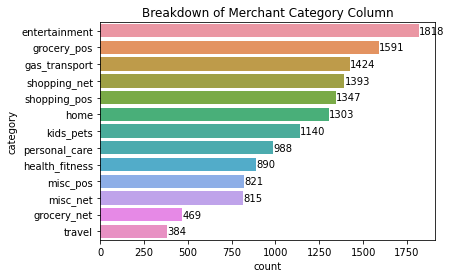

In [52]:
# Get the sorted index of categories based on their counts
sorted_categories_fraud_df = fraud_df['category'].value_counts().index

# Creating the bar chart
ax = sns.countplot(y='category', data=fraud_df, order=sorted_categories_fraud_df)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Merchant Category Column")

## Whether Transaction is Fraud or Not Column

In [53]:
# Checking the different categories in the 'fraud_df['is_fraud']' column

fraud_df['is_fraud'].value_counts()

0                         12600
1                          1781
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: is_fraud, dtype: int64

In [54]:
# Reclassifying the entry of '1"2020-12-24 16:56:24"'' to '1'

# Reclassifying the entry of '0"2019-01-01 00:00:44" to '0'

fraud_df['is_fraud'] = fraud_df['is_fraud'].str.replace('1"2020-12-24 16:56:24"', '1').str.replace('0"2019-01-01 00:00:44"', '0')

In [55]:
# Checking the different categories in the 'fraud_df['is_fraud']' column

fraud_df['is_fraud'].value_counts()

0    12601
1     1782
Name: is_fraud, dtype: int64

In [56]:
# Converting data type of 'is_fraud' column to numeric

fraud_df['is_fraud'] = fraud_df['is_fraud'].astype(int)

In [57]:
# Checking the different categories in the 'fraud_df['is_fraud']' column

fraud_df['is_fraud'].value_counts()

0    12601
1     1782
Name: is_fraud, dtype: int64

The data cleaning and preparation for the Fraud column is complete.  There are currently 12,601 cases of no fraud, and 1,782 cases of Fraud.  A breakdown is shown via bar chart below.

Text(0.5, 1.0, 'Breakdown of Fraud Cases')

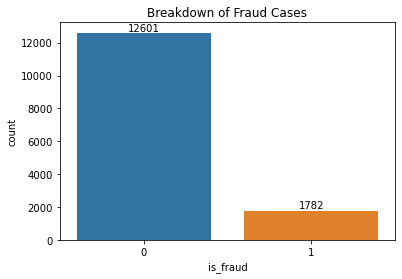

In [58]:
# Create a bar chart for Value Counts of the 'is_fraud' column

ax = sns.countplot(x='is_fraud', data=fraud_df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Fraud Cases")

## State of Credit Card Holder

In [59]:
# Checking the different categories in the 'fraud_df['state']' column

fraud_df['state'].value_counts()

CA    3366
MO    2324
NE    1438
OR    1211
WA    1150
WY    1100
NM    1003
CO     856
AZ     673
UT     585
ID     347
HI     172
AK     158
Name: state, dtype: int64

In [60]:
state_mapping_table = {
                        'CA': 'California',
                        'MO': 'Midwest',
                        'NE': 'Midwest',
                        'OR': 'West',
                        'WA': 'West',
                        'WY': 'West',
                        'CO': 'West',
                        'UT': 'West',
                        'ID': 'West',
                        'HI': 'West',
                        'AK': 'West',
                        'NM': 'Southwest',
                        'AZ': 'Southwest'
                            }

In [61]:
# Mapping the 'state_mapping_table' to the 'State' column

fraud_df['state'] = fraud_df['state'].map(state_mapping_table)

In [62]:
# Checking the different categories in the 'fraud_df['state']' column

fraud_df['state'].value_counts()

West          5579
Midwest       3762
California    3366
Southwest     1676
Name: state, dtype: int64

In [63]:
fraud_df.rename(columns = {'state':'region'}, inplace=True)

In [64]:
# Verifying whether or not the 'State' column has been renamed to 'Region'

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   category               14383 non-null  object 
 2   amt                    14383 non-null  float64
 3   region                 14383 non-null  object 
 4   lat                    14383 non-null  float64
 5   long                   14383 non-null  float64
 6   city_pop               14383 non-null  int64  
 7   merch_lat              14383 non-null  float64
 8   merch_long             14383 non-null  float64
 9   is_fraud               14383 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 1.8+ MB


I have completed grouping the states into regions based on the following source: [National Geographic United States Regions](https://education.nationalgeographic.org/resource/united-states-regions/).  I decided to maintain California as its own since it is the state with the most credit card transactions.

I also renamed the state column as region.  The bar chart below provides a breakdown of credit card transactions by region.

Text(0.5, 1.0, 'Breakdown of Credit Card Transactions by Region')

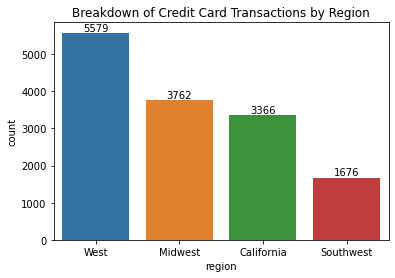

In [65]:
# Create a bar chart for Value Counts of the 'Region' column

ax = sns.countplot(x='region', data=fraud_df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Credit Card Transactions by Region")

## Transaction Date | Transaction Time Column

In [66]:
# Examining the Data Type of the 'Transaction Date / Transaction Time' column

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   category               14383 non-null  object 
 2   amt                    14383 non-null  float64
 3   region                 14383 non-null  object 
 4   lat                    14383 non-null  float64
 5   long                   14383 non-null  float64
 6   city_pop               14383 non-null  int64  
 7   merch_lat              14383 non-null  float64
 8   merch_long             14383 non-null  float64
 9   is_fraud               14383 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 1.8+ MB


In [67]:
# Converting data type of the 'Transaction Date / Transaction Time' column to datetime

fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'], format="%d-%m-%Y %H:%M")

In [68]:
# Verifying whether or not the data type of the 'Transaction Date / Transaction Time' column has been converted to datetime

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   merch_lat              14383 non-null  float64       
 8   merch_long             14383 non-null  float64       
 9   is_fraud               14383 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1), object(2)
memory usage: 1.8+ MB


### Creating Hour Column

In [69]:
# Creating the 'Hour' column by extrapolating the hour from the 'Transaction Date / Transaction Time' column 

fraud_df['hour'] = fraud_df['trans_date_trans_time'].dt.hour

In [70]:
# Checking whether or not the 'Hour' column has been created

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   merch_lat              14383 non-null  float64       
 8   merch_long             14383 non-null  float64       
 9   is_fraud               14383 non-null  int32         
 10  hour                   14383 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(2)
memory usage: 1.9+ MB


In [71]:
# Examining the contents of the 'Hour' column

fraud_df['hour'].head(10)

0     0
1    15
2    22
3    23
4    23
5     3
6     3
7    11
8    18
9    22
Name: hour, dtype: int64

In [72]:
# Examining the value counts for each hour in the 'Hour' column

fraud_df['hour'].value_counts()

23    1109
22    1104
20     702
21     691
15     669
19     667
17     666
18     662
16     652
13     638
14     629
12     624
1      607
0      581
3      560
2      519
7      438
10     418
8      416
6      415
4      413
5      406
11     401
9      396
Name: hour, dtype: int64

I have created a new column titled *fraud_df['hour']*.  An interesting observation is that the number of credit card transactions increases as midnight approaches.  The bar chart below reflects the breakdown of credit card transactions by the hour.

Text(0.5, 1.0, 'Breakdown of Credit Card Transactions by Top 10 Hour Time Slots')

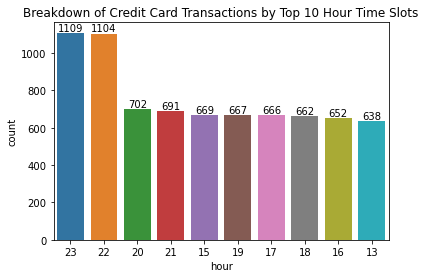

In [73]:
# Get the top 10 hours with the most transactions
top_10_hours = fraud_df['hour'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 hours
filtered_fraud_df = fraud_df[fraud_df['hour'].isin(top_10_hours)]

# Creating the bar chart with only the top 10 hours
ax = sns.countplot(x='hour', data=filtered_fraud_df, order=top_10_hours)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Credit Card Transactions by Top 10 Hour Time Slots")

In [74]:
# Examining the 'all_fraud_cases' dataframe

all_fraud_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 13396
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  1844 non-null   object 
 1   merchant               1844 non-null   object 
 2   category               1844 non-null   object 
 3   amt                    1844 non-null   float64
 4   city                   1844 non-null   object 
 5   state                  1844 non-null   object 
 6   lat                    1844 non-null   float64
 7   long                   1844 non-null   float64
 8   city_pop               1844 non-null   int64  
 9   job                    1844 non-null   object 
 10  dob                    1844 non-null   object 
 11  trans_num              1844 non-null   object 
 12  merch_lat              1844 non-null   float64
 13  merch_long             1844 non-null   float64
 14  is_fraud               1844 non-null   object 
dtypes: 

In [75]:
# Converting data type of the 'Transaction Date / Transaction Time' column to datetime via "all_fraud_cases" dataframe

all_fraud_cases['trans_date_trans_time'] = pd.to_datetime(all_fraud_cases['trans_date_trans_time'])

In [76]:
# Verifying whether or not the data type of the 'Transaction Date / Transaction Time' column has been converted to datetime via "all_fraud_cases" dataframe

all_fraud_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 13396
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  1844 non-null   datetime64[ns]
 1   merchant               1844 non-null   object        
 2   category               1844 non-null   object        
 3   amt                    1844 non-null   float64       
 4   city                   1844 non-null   object        
 5   state                  1844 non-null   object        
 6   lat                    1844 non-null   float64       
 7   long                   1844 non-null   float64       
 8   city_pop               1844 non-null   int64         
 9   job                    1844 non-null   object        
 10  dob                    1844 non-null   object        
 11  trans_num              1844 non-null   object        
 12  merch_lat              1844 non-null   float64       
 13  me

In [77]:
# Creating the 'Hour' column by extrapolating the hour from the 'Transaction Date / Transaction Time' column via "all_fraud_cases" dataframe

all_fraud_cases['hour'] = all_fraud_cases['trans_date_trans_time'].dt.hour

In [78]:
# Checking whether or not the 'Hour' column has been created via "all_fraud_cases" dataframe

all_fraud_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 13396
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  1844 non-null   datetime64[ns]
 1   merchant               1844 non-null   object        
 2   category               1844 non-null   object        
 3   amt                    1844 non-null   float64       
 4   city                   1844 non-null   object        
 5   state                  1844 non-null   object        
 6   lat                    1844 non-null   float64       
 7   long                   1844 non-null   float64       
 8   city_pop               1844 non-null   int64         
 9   job                    1844 non-null   object        
 10  dob                    1844 non-null   object        
 11  trans_num              1844 non-null   object        
 12  merch_lat              1844 non-null   float64       
 13  me

In [79]:
# Examining the contents of the 'Hour' column via "all_fraud_cases" dataframe

all_fraud_cases['hour'].head(10)

0     0
1    15
2    22
3    23
4    23
5     3
6     3
7    11
8    18
9    22
Name: hour, dtype: int64

In [80]:
# Examining the value counts for each hour in the 'Hour' column "all_fraud_cases" dataframe

all_fraud_cases['hour'].value_counts()

23    476
22    468
1     174
0     174
3     147
2     142
16     24
15     24
20     23
17     20
18     20
21     18
12     17
14     16
13     14
8      14
9      12
19     11
5      10
10     10
7       9
4       7
6       7
11      7
Name: hour, dtype: int64

Based on the aforementioned bar chart - *Breakdown of Top 10 Credit Card Transactions by Hour* - I assumed that most of the fraud cases took place as midnight approached.

To investigate this, I utilized the dataframe I created that only contained the fraud cases.  It is called *all_fraud_cases*.  Based on the following bar chart - *Breakdown of Fraud Cases by Top 10 Hour Time Slots* - it seems my assumption is true.  As midnight approaches, the number of fraud cases increases.

Text(0.5, 1.0, 'Breakdown of Fraud Cases by Top 10 Hour Time Slots')

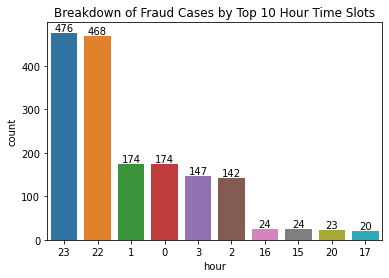

In [81]:
# Get the top 10 hours with the most fraud cases
top_10_hours_fraud_cases = all_fraud_cases['hour'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 hours in respect to fraud cases
filtered_fraud_cases_df = all_fraud_cases[all_fraud_cases['hour'].isin(top_10_hours_fraud_cases)]

# Creating the bar chart with only the top 10 hours in respect to fraud cases
ax = sns.countplot(x='hour', data=filtered_fraud_cases_df, order=top_10_hours_fraud_cases)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Fraud Cases by Top 10 Hour Time Slots")

### Creating Month Column

In [82]:
# Creating a 'Month' column

fraud_df['month'] = fraud_df['trans_date_trans_time'].dt.month

In [83]:
# Verifying the 'Month' column is created

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   merch_lat              14383 non-null  float64       
 8   merch_long             14383 non-null  float64       
 9   is_fraud               14383 non-null  int32         
 10  hour                   14383 non-null  int64         
 11  month                  14383 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(3), object

In [84]:
# Examining the contents of the 'Month' column

fraud_df['month'].value_counts()

1     6743
12    6161
3      220
9      197
2      169
5      167
8      156
10     150
7      125
4      120
6       92
11      83
Name: month, dtype: int64

In [85]:
# Converting the 'Month' column to string

fraud_df['month'] = fraud_df['month'].apply(lambda x: str(x))

In [86]:
# Verifying whether or not the 'Month' column has been converted to string

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   merch_lat              14383 non-null  float64       
 8   merch_long             14383 non-null  float64       
 9   is_fraud               14383 non-null  int32         
 10  hour                   14383 non-null  int64         
 11  month                  14383 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object

In [87]:
fraud_df['month'].value_counts()

1     6743
12    6161
3      220
9      197
2      169
5      167
8      156
10     150
7      125
4      120
6       92
11      83
Name: month, dtype: int64

In [88]:
# Creating a mapping table to convert the numerical values in the 'Month' column to months of the year

month_mapping = {
                "1" : "January",
                "2" : "February",
                "3" : "March",
                "4" : "April", 
                "5" : "May",
                "6" : "June",
                "7" : "July",
                "8" : "August",
                "9" : "September",
                "10": "October",
                "11": "November",
                "12": "December",
                                }

In [89]:
# Applying the mapping table to the 'Month' column

fraud_df['month'] = fraud_df['month'].map(month_mapping)

In [90]:
# Examining the value counts within the 'Month' column

fraud_df['month'].value_counts()

January      6743
December     6161
March         220
September     197
February      169
May           167
August        156
October       150
July          125
April         120
June           92
November       83
Name: month, dtype: int64

I have created a new column titled *fraud_df['month']*.  An interesting observation is that the number of credit card transactions increases around the months of December and January.  This time of the year is associated with the holidays (i.e. - Christmas).  

The bar chart below reflects the breakdown of credit card transactions by months of the year.

Text(0.5, 1.0, 'Breakdown of Credit Card Transactions by Month')

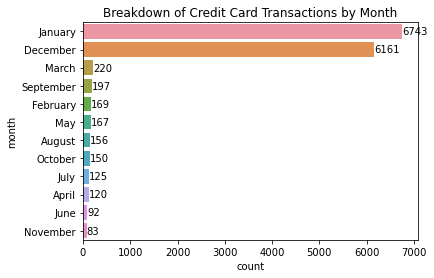

In [91]:
# Get the sorted index of categories based on their counts
sorted_categories_fraud_df_months = fraud_df['month'].value_counts().index

# Creating the bar chart
ax = sns.countplot(y='month', data=fraud_df, order=sorted_categories_fraud_df_months)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Credit Card Transactions by Month")

In [92]:
# Creating a mapping table to convert the months of the year back to numerical values

month_mapping_reverse = {
                 "January" : "1",
                 "February" : "2",
                 "March" : "3",
                 "April" : "4", 
                 "May" : "5",
                 "June" : "6",
                 "July" : "7",
                 "August" : "8",
                 "September" : "9",
                 "October" : "10",
                 "November" : "11",
                 "December" : "12",
                                }

In [93]:
# Applying the mapping table to the 'Month' column in order to convert the months back to numerical values

fraud_df['month'] = fraud_df['month'].map(month_mapping_reverse)

In [94]:
# Converting the 'Month' column to integer

fraud_df['month'] = fraud_df['month'].apply(lambda x: int(x))

In [95]:
# Examining the data type of the 'Month' column

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   merch_lat              14383 non-null  float64       
 8   merch_long             14383 non-null  float64       
 9   is_fraud               14383 non-null  int32         
 10  hour                   14383 non-null  int64         
 11  month                  14383 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(3), object

In [96]:
# Creating the 'Month' column by extrapolating the hour from the 'Transaction Date / Transaction Time' column via "all_fraud_cases" dataframe

all_fraud_cases['month'] = all_fraud_cases['trans_date_trans_time'].dt.month

In [97]:
# Checking whether or not the 'Month' column has been created via "all_fraud_cases" dataframe

all_fraud_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 13396
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  1844 non-null   datetime64[ns]
 1   merchant               1844 non-null   object        
 2   category               1844 non-null   object        
 3   amt                    1844 non-null   float64       
 4   city                   1844 non-null   object        
 5   state                  1844 non-null   object        
 6   lat                    1844 non-null   float64       
 7   long                   1844 non-null   float64       
 8   city_pop               1844 non-null   int64         
 9   job                    1844 non-null   object        
 10  dob                    1844 non-null   object        
 11  trans_num              1844 non-null   object        
 12  merch_lat              1844 non-null   float64       
 13  me

In [98]:
# Converting the 'Month' column to string

all_fraud_cases['month'] = all_fraud_cases['month'].apply(lambda x: str(x))

In [99]:
# Applying the mapping table to the 'Month' column via "all_fraud_cases" dataframe

all_fraud_cases['month'] = all_fraud_cases['month'].map(month_mapping)

In [100]:
# Examining the value counts for each hour in the 'Month' column "all_fraud_cases" dataframe

all_fraud_cases['month'].value_counts()

January      223
March        190
May          178
October      157
August       156
February     155
September    150
April        147
July         141
December     138
November     130
June          79
Name: month, dtype: int64

Based on the aforementioned bar chart - *Breakdown of Credit Card Transactions by Month* - I assumed that most of the fraud cases took place around December and January.

To investigate this, I utilized the dataframe I created that only contained the fraud cases.  Based on the following bar chart - *Breakdown of Fraud Cases by Month* - it seems my assumption is not entirely true.  In comparison to the other months, January had the highest number of fraud cases.  The number of fraud cases in January is 223.  

December ranked third to last in respect to the number of fraud cases.  The number of fraud cases is 138. 

Text(0.5, 1.0, 'Breakdown of Fraud Cases by Month')

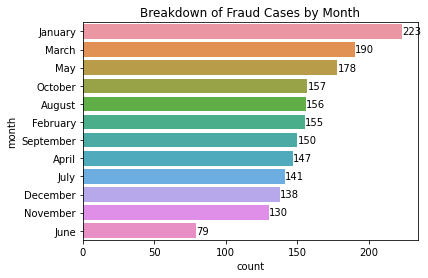

In [101]:
# Get the sorted index of categories based on their counts
sorted_categories_all_fraud_cases_months = all_fraud_cases['month'].value_counts().index

# Creating the bar chart
ax = sns.countplot(y='month', data=all_fraud_cases, order=sorted_categories_all_fraud_cases_months)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Fraud Cases by Month")

### Creating Year Column

In [102]:
# Creating a 'Year' column

fraud_df['year'] = fraud_df['trans_date_trans_time'].dt.year

In [103]:
# Verifying the 'Year' column is created

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   merch_lat              14383 non-null  float64       
 8   merch_long             14383 non-null  float64       
 9   is_fraud               14383 non-null  int32         
 10  hour                   14383 non-null  int64         
 11  month                  14383 non-null  int64         
 12  year                   14383 non-null  int64         
dtypes

In [104]:
# Examining the contents of the 'Year' column

fraud_df['year'].value_counts()

2019    7580
2020    6803
Name: year, dtype: int64

In respect to year, the credit card transactions are only broken down by two years - 2019 and 2020.  In other words, the dataset only has data for 2019 and 2020.  I will drop the column from the dataframe.  Interim, there is a bar chart below that provides a breakdown of credit card transactions by year.

Text(0.5, 1.0, 'Breakdown of Credit Card Transactions by Year')

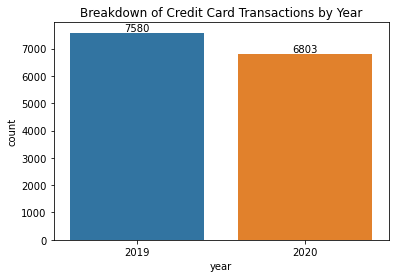

In [105]:
# Create a bar chart for Value Counts of the 'Year' column

ax = sns.countplot(x='year', data=fraud_df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Credit Card Transactions by Year")

In [106]:
# Dropping the 'Year' column from the dataframe

fraud_df.drop(columns='year', inplace=True)

In [107]:
# Examining whether or not the 'year' column has been removed from the dataframe

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   merch_lat              14383 non-null  float64       
 8   merch_long             14383 non-null  float64       
 9   is_fraud               14383 non-null  int32         
 10  hour                   14383 non-null  int64         
 11  month                  14383 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(3), object

### Dropping the Transaction Date | Transaction Time Column

In [108]:
# Dropping the 'Transaction Date | Transaction Time' column from the dataframe

fraud_df.drop(columns='trans_date_trans_time', inplace=True)

In [109]:
# Examining whether or not the 'Transaction Date | Transaction Time' column has been removed from the dataframe

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    14383 non-null  object 
 1   amt         14383 non-null  float64
 2   region      14383 non-null  object 
 3   lat         14383 non-null  float64
 4   long        14383 non-null  float64
 5   city_pop    14383 non-null  int64  
 6   merch_lat   14383 non-null  float64
 7   merch_long  14383 non-null  float64
 8   is_fraud    14383 non-null  int32  
 9   hour        14383 non-null  int64  
 10  month       14383 non-null  int64  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 1.9+ MB


I utilized the following code - *fraud_df.drop(columns='trans_date_trans_time', inplace=True)* - to drop the Transaction Date | Transaction Time Column.

# Modeling

I have completed the Data Preparation stage.  I will use three sets of models for detecting credit card fraud.  The algorithms are listed below:

- Decision Tree
- Random Forest
- Gradient Boosting

## Train-Test Split

In [110]:
# Identifying Target Variable

X = fraud_df.drop('is_fraud', axis=1)
y = fraud_df['is_fraud']

In [111]:
# Checking whether or not creating the dummy variables is complete

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    14383 non-null  object 
 1   amt         14383 non-null  float64
 2   region      14383 non-null  object 
 3   lat         14383 non-null  float64
 4   long        14383 non-null  float64
 5   city_pop    14383 non-null  int64  
 6   merch_lat   14383 non-null  float64
 7   merch_long  14383 non-null  float64
 8   hour        14383 non-null  int64  
 9   month       14383 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 1.8+ MB


In [112]:
# Creating dummy variables for the categorical variables in the X, or the Predictors

X = pd.get_dummies(X, drop_first=True)

I utilized the following code - *X = pd.get_dummies(X, drop_first=True)* - to create dummy variables for the categorical variables.

There are a total of 24 columns in the X variable.  This is due to the Category of Merchant column containing 14 unique values, which are the following:

- *entertainment*     
- *grocery_pos*       
- *gas_transport*     
- *shopping_net*      
- *shopping_pos*      
- *home*              
- *kids_pets*        
- *personal_care*      
- *health_fitness*     
- *misc_pos*           
- *misc_net*           
- *grocery_net*        
- *travel*

In addition, the Region column contains 5 different unique values, which are the following:

- California
- Midwest
- Southwest
- West

In [113]:
# Performing a train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

## Baseline Decision Tree Model

In [114]:
# Creating the Decision Tree classifier, and fitting it on the training data

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [115]:
# Making predictions with the training data via Baseline Decision Tree Classifier

y_hat_train_clf = clf.predict(X_train)

In [116]:
# Generating Predictions for X-Test, or test data, via Baseline Decision Tree Classifier

y_hat_test_clf = clf.predict(X_test) 

In [117]:
# Creating an evaluation metrics function

def evaluation_metrics(y_hat_train, y_train, y_hat_test, y_test):
    
    
    # Calculate Metrics
    
    train_precision = precision_score(y_train, y_hat_train, average='binary', zero_division=0)
    test_precision = precision_score(y_test, y_hat_test, average='binary', zero_division=0)

    train_recall = recall_score(y_train, y_hat_train, average='binary', zero_division=0)
    test_recall = recall_score(y_test, y_hat_test, average='binary', zero_division=0)

    train_accuracy = accuracy_score(y_train, y_hat_train)
    test_accuracy = accuracy_score(y_test, y_hat_test)

    train_f1 = f1_score(y_train, y_hat_train, average='binary', zero_division=0)
    test_f1 = f1_score(y_test, y_hat_test, average='binary', zero_division=0)

    # Print metrics
    
    print('Training Precision:', train_precision)
    print('Testing Precision: ', test_precision)
    print('\n\n')
    print('Training Recall: ', train_recall)
    print('Testing Recall: ', test_recall)
    print('\n\n')
    print('Training Accuracy: ', train_accuracy)
    print('Testing Accuracy: ', test_accuracy)
    print('\n\n')
    print('Training F1-Score: ', train_f1)
    print('Testing F1-Score: ', test_f1)
    

In [118]:
# Creating confusion matrix function

def cnf_matrix_display(y_test, y_hat_test, title, labels=['Not Fraud', 'Fraud']):

    # Creating the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_hat_test)

    print('Confusion Matrix:\n', conf_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="RdBu_r", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

In [119]:
# Creating an ROC Curve function

def plot_roc_curve(X_train, X_test, y_train, y_test, classifier, title):
    """
    Plots the ROC curve for the given classifier and dataset.
    """
    # Convert categorical labels to numeric if needed
    
    # Predict probabilities
    y_score = classifier.predict_proba(X_test)[:,1]

    # Compute ROC curve and AUC
    fpr_baseline, tpr_baseline, thresholds = roc_curve(y_test, y_score)
    auc_score = auc(fpr_baseline, tpr_baseline)

    # Print AUC score
    print('AUC: {}'.format(auc_score))
    
    # Seaborn styling
    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

    # Plotting
    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(fpr_baseline, tpr_baseline, color='darkorange', lw=lw, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

In [120]:
# Creating a Precision-Recall Curve Function

def plot_precision_recall_curve(X_train, X_test, y_train, y_test, classifier, title):
    
    # Predict probabilities
    y_scores = classifier.predict_proba(X_test)[:, 1]
    
    # Compute precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

    # Calculate AUC-PR
    auc_pr = auc(recall, precision)
    
    # Print AUC-PR score
    print('AUC-PR: {}'.format(auc_pr))
    
    # Plotting
    plt.plot(recall, precision, marker='.', label=f'AUC-PR = {auc_pr:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.show()

In [121]:
# Calculating Baseline Decision Tree Model Metrics

evaluation_metrics(y_hat_train_clf, y_train, y_hat_test_clf, y_test)

Training Precision: 1.0
Testing Precision:  0.9396092362344582



Training Recall:  1.0
Testing Recall:  0.9724264705882353



Training Accuracy:  1.0
Testing Accuracy:  0.9886442641946698



Training F1-Score:  1.0
Testing F1-Score:  0.9557362240289069


Confusion Matrix:
 [[3737   34]
 [  15  529]]


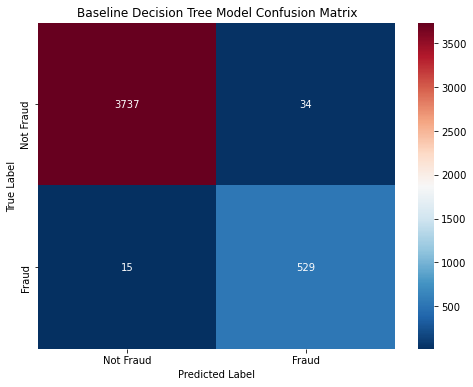

In [122]:
# Creating Confusion Matrix for the Baseline Decision Tree Model

cnf_matrix_display(y_test, y_hat_test_clf, title='Baseline Decision Tree Model Confusion Matrix')

AUC: 0.98170514725381


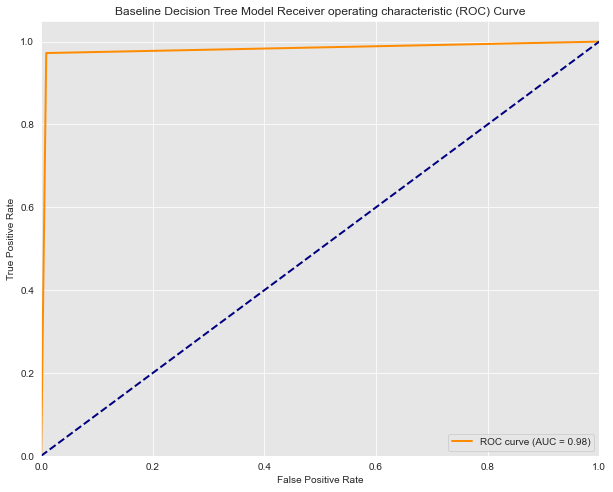

In [123]:
# Creating ROC curve for the Baseline Decision Tree Model

plot_roc_curve(X_train, X_test, y_train, y_test, clf, title='Baseline Decision Tree Model Receiver operating characteristic (ROC) Curve')

AUC-PR: 0.9577559762386931


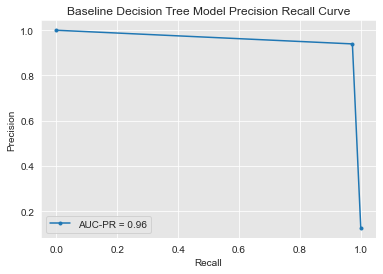

In [124]:
# Creating a Precision Recall Curve for the Baseline Decision Tree Model

plot_precision_recall_curve(X_train, X_test, y_train, y_test, clf, title='Baseline Decision Tree Model Precision Recall Curve')

### Baseline Decision Tree Model | Conclusion

I have concluded creating a Baseline Decision Tree model.

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 100.0%
- Recall: 100.0%
- Accuracy: 100.0%
- F1 Score: 100.0%
    
When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 91.4%
- Recall: 91.7%
- Accuracy: 97.9%
- F1 Score: 91.6%
      
This model has slight overfitting due to the discrepancies in the training and test metrics.

I also want to point out that recall wil be the key model evaluation metric.

Accuracy is not appropriate since there is a class imbalance.  It is ideal to improve precision.  Improving model precision will lower the amount of false positives.  In the case of credit card fraud, a false positive is the model stating that an individual committed credit card fraud; however, in reality, the individual did not commit credit card fraud.

Improving model recall will lower the amount of false negatives.  In the case of credit card fraud, a false negative is the model stating that an individual did not commit credit card fraud; however, in reality, the individual did commit credit card fraud.

Provided the aforementioned context, a false negative is more detrimental than a false positive.  As a result, recall will be the key model evaluation metric.

I am going to proceed by tuning the decision tree classifier.

## Tuning the Baseline Decision Tree Model

There are multiple variables in which I want to tune the decision tree classifier. I will currently focus on the following:

- Maximum Tree Depth (*max_depth*) - depth of the decision tree, the maximum number of splits a decision tree can have before continue to grow
- Minimum Sample Split (*min_samples_split*) - minimum number of samples required to split an internal node
- Minimum Sample Leafs (*min_samples_leaf*) - minimum number of samples for a leaf node, or terminal node
- Maximum Features (*max_features*) - maximum number of features considered for making a split at a tree node

In [125]:
# Creating a function for identifying Maximum Tree Depth

def identify_max_depth(X_train, X_test, y_train, y_test, classifier, **kwargs):
    
    max_depths = list(range(1, 30))
    train_results = []
    test_results = []
    for max_depth in max_depths:
        
        # Initialize the classifier with max_depth and any additional kwargs
        ct = classifier(max_depth=max_depth, random_state=42, **kwargs)
        ct.fit(X_train, y_train)
        y_hat_train_ct = ct.predict_proba(X_train)[:, 1]
        fpr_ct, tpr_ct, thresholds_ct = roc_curve(y_train, y_hat_train_ct)
        roc_auc_ct = auc(fpr_ct, tpr_ct)
    
        # Add auc score to previous train results
        train_results.append(roc_auc_ct)
        y_hat_test_ct = ct.predict_proba(X_test)[:, 1]
        fpr_ct, tpr_ct, thresholds_ct = roc_curve(y_test, y_hat_test_ct)
        roc_auc_ct = auc(fpr_ct, tpr_ct)
    
        # Add auc score to previous test results
        test_results.append(roc_auc_ct)

    plt.figure(figsize=(12,6))
    plt.plot(max_depths, train_results, 'b', label='Train AUC')
    plt.plot(max_depths, test_results, 'y', label='Test AUC')
    plt.ylabel('AUC score')
    plt.xlabel('Tree depth')
    plt.legend()
    plt.show()

In [126]:
# Creating a function for identifying Minimum Sample Split

def identify_min_samples_split(X_train, X_test, y_train, y_test, classifier, **kwargs):

    min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
    train_results = []
    test_results = []
    for min_samples_split in min_samples_splits:
        
        # Initialize the classifier with min_samples_split and any additional kwargs
        ct = classifier(min_samples_split=min_samples_split, random_state=42, **kwargs)
        ct.fit(X_train, y_train)
        y_hat_train_ct = ct.predict_proba(X_train)[:, 1]
        fpr_ct, tpr_ct, thresholds_ct = roc_curve(y_train, y_hat_train_ct)
        roc_auc_ct = auc(fpr_ct, tpr_ct)
    
        # Add auc score to previous train results
        train_results.append(roc_auc_ct)
        y_hat_test_ct = ct.predict_proba(X_test)[:, 1]
        fpr_ct, tpr_ct, thresholds_ct = roc_curve(y_test, y_hat_test_ct)
        roc_auc_ct = auc(fpr_ct, tpr_ct)
    
        # Add auc score to previous test results
        test_results.append(roc_auc_ct)

    plt.figure(figsize=(12,6))
    plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
    plt.plot(min_samples_splits, test_results, 'y', label='Test AUC')
    plt.xlabel('Minimum Sample splits')
    plt.legend()
    plt.show()

In [127]:
# Creating a function for identifying Minimum Sample Leaf

def identify_min_samples_leaf(X_train, X_test, y_train, y_test, classifier, **kwargs):

    min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
    train_results = []
    test_results = []
    for min_samples_leaf in min_samples_leafs:
        
        # Initialize the classifier with min_samples_leaf and any additional kwargs
        ct = classifier(min_samples_leaf=min_samples_leaf, random_state=42)
        ct.fit(X_train, y_train)
        y_hat_train_ct = ct.predict_proba(X_train)[:, 1]
        fpr_ct, tpr_ct, thresholds_ct = roc_curve(y_train, y_hat_train_ct)
        roc_auc_ct = auc(fpr_ct, tpr_ct)
        
        # Add auc score to previous train results
        train_results.append(roc_auc_ct)
        y_hat_test_ct = ct.predict_proba(X_test)[:, 1]
        fpr_ct, tpr_ct, thresholds_ct = roc_curve(y_test, y_hat_test_ct)
        roc_auc_ct = auc(fpr_ct, tpr_ct)
        
        # Add auc score to previous test results
        test_results.append(roc_auc_ct)
    
    plt.figure(figsize=(12,6))    
    plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
    plt.plot(min_samples_leafs, test_results, 'y', label='Test AUC')
    plt.ylabel('AUC score')
    plt.xlabel('Minimum Sample Leafs')
    plt.legend()
    plt.show()

In [128]:
# Creating a function for identifying Maximum Features

def identify_max_features(X_train, X_test, y_train, y_test, classifier, **kwargs):

    max_features = list(range(1, X_train.shape[1]))
    train_results = []
    test_results = []
    for max_feature in max_features:
        
        # Initialize the classifier with max_features and any additional kwargs
        ct = classifier(max_features=max_feature, random_state=42)
        ct.fit(X_train, y_train)
        y_hat_train_ct = ct.predict_proba(X_train)[:, 1]
        fpr_ct, tpr_ct, thresholds_ct = roc_curve(y_train, y_hat_train_ct)
        roc_auc_ct = auc(fpr_ct, tpr_ct)
        
        # Add auc score to previous train results
        train_results.append(roc_auc_ct)
        y_hat_test_ct = ct.predict_proba(X_test)[:, 1]
        fpr_ct, tpr_ct, thresholds_ct = roc_curve(y_test, y_hat_test_ct)
        roc_auc_ct = auc(fpr_ct, tpr_ct)
        
        # Add auc score to previous test results
        test_results.append(roc_auc_ct)

    plt.figure(figsize=(12,6))
    plt.plot(max_features, train_results, 'b', label='Train AUC')
    plt.plot(max_features, test_results, 'y', label='Test AUC')
    plt.ylabel('AUC score')
    plt.xlabel('max features')
    plt.legend()
    plt.show()

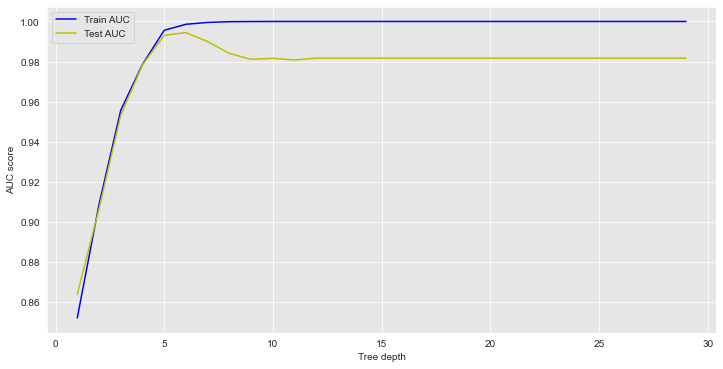

In [129]:
# Identifying Maximum Tree Depth for the Decision Tree Model

identify_max_depth(X_train, X_test, y_train, y_test, DecisionTreeClassifier, criterion='entropy')

The optimal tree depth is approximately 4.  After a tree depth of 4, the AUC scores for the train and test data begin to bifurcate.

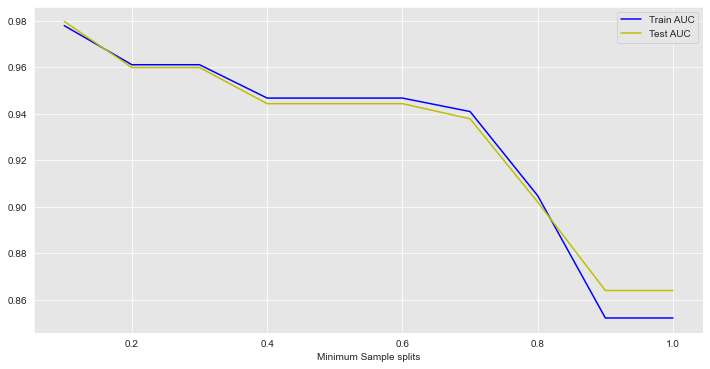

In [130]:
# Identifying Minimum Sample Split for the Decision Tree Model

identify_min_samples_split(X_train, X_test, y_train, y_test, DecisionTreeClassifier, criterion='entropy')

The optimal minimum sample split is approximately 0.1.  The AUC scores for the train and test data tend to move together; however, the AUC scores for the train and test data continue to decrease.

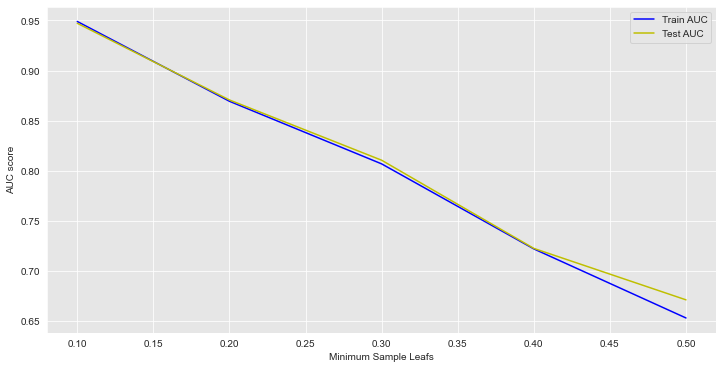

In [131]:
# Identifying Minimum Sample Leaf for the Decision Tree Model

identify_min_samples_leaf(X_train, X_test, y_train, y_test, DecisionTreeClassifier, criterion='entropy')

The optimum minimum sample leaf is approximately 0.10.  The AUC scores associated with the train and test data tend to remain converged; however, the AUC scores for the train and test data continue to decrease.

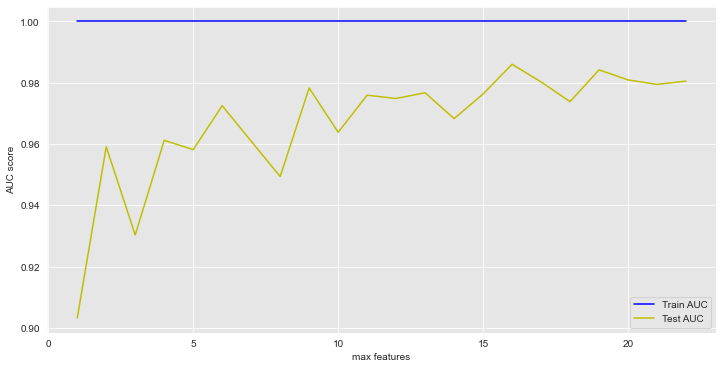

In [132]:
# Identifying Maximum Features for the Decision Tree Model

identify_max_features(X_train, X_test, y_train, y_test, DecisionTreeClassifier, criterion='entropy')

There is no optimal value for Maximum Features.  The AUC scores for the train and test data remain disparate throughout the graph.

I have found the approximate optimal values for Maximum Tree Depth, Minimum Sample Split, and Minimum Sample Leaf. I will create a pipeline and grid search cv that will not only incorporate the aforementioned values, but vary the Decision Tree model criterion and Decision Tree class weight.

In [133]:
# Pipeline

# Creating a pipeline for tuning the Decisiion Tree Model

steps_clf_tune = [('clf', DecisionTreeClassifier(random_state=42))]


pipe_clf_tune = Pipeline(steps_clf_tune) 

In [134]:
# Creating Grid Search for tuning the Decision Tree Model

# Set Grid for Search


params_clf_tune = [{'clf__max_depth': [1, 2, 3, 4, 5],
                     'clf__min_samples_split': [0.1, 0.2, 0.3, 0.4],
                     'clf__min_samples_leaf': [0.10, 0.15, 0.20],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__class_weight': [None, 'balanced']
                   }]

In [135]:
# Instanstiate grid search object for tuning the Decision Tree Model

grid_clf_tune = GridSearchCV(estimator=pipe_clf_tune, 
                          param_grid=params_clf_tune, 
                          scoring='recall', 
                          cv=5)

In [136]:
# Fitting the grid search object to data and finding the best model

grid_clf_tune.fit(X_train, y_train)

best_pipe_clf_tune = grid_clf_tune.best_estimator_

In [137]:
# Displaying the best parameters from the grid search object

print(grid_clf_tune.best_params_)

{'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__min_samples_leaf': 0.15, 'clf__min_samples_split': 0.1}


I have created the pipeline and grid search object.  When I utilized the following code - *grid_clf_tune.best_params_* - the optimal values are the following:

- class weight: balanced
- criterion: entropy
- maximum depth: 3
- minimum samples leaf: 0.15
- minimum samples split: 0.1

In [138]:
# Predicting y-train with the tuned Decision Tree model

y_hat_train_clf_tune = best_pipe_clf_tune.predict(X_train)

In [139]:
# Predicting y-test with tuned Decision Tree model

y_hat_test_clf_tune = best_pipe_clf_tune.predict(X_test)

In [140]:
# Evaulation metrics for Tuned Decision Tree Model

evaluation_metrics(y_hat_train_clf_tune, y_train, y_hat_test_clf_tune, y_test)

Training Precision: 0.3561643835616438
Testing Precision:  0.35497237569060774



Training Recall:  0.9450726978998385
Testing Recall:  0.9448529411764706



Training Accuracy:  0.7831744139849026
Testing Accuracy:  0.7765932792584009



Training F1-Score:  0.5173557373424718
Testing F1-Score:  0.5160642570281124


Confusion Matrix:
 [[2837  934]
 [  30  514]]


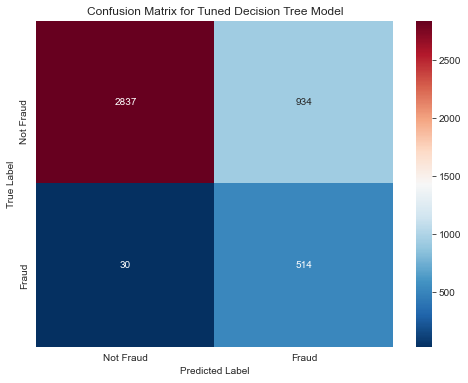

In [141]:
# Creating Confusion Marix for the Tuned Decision Tree Model

cnf_matrix_display(y_test, y_hat_test_clf_tune, title='Confusion Matrix for Tuned Decision Tree Model')

AUC: 0.9195159069992356


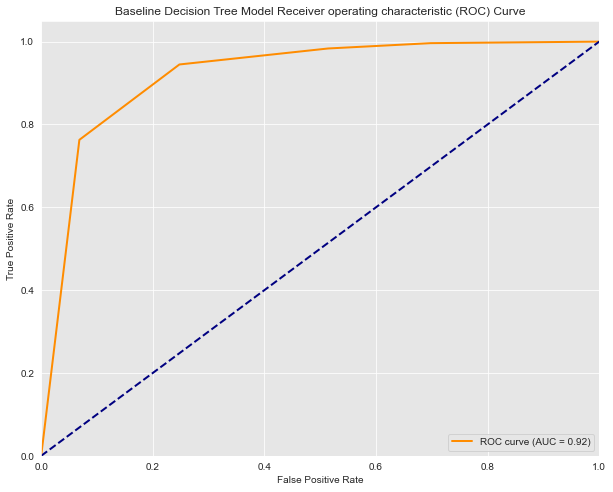

In [142]:
# Creating ROC curve for the Tuned Decision Tree Model

plot_roc_curve(X_train, X_test, y_train, y_test, best_pipe_clf_tune, title='Baseline Decision Tree Model Receiver operating characteristic (ROC) Curve')

AUC-PR: 0.7191126838879426


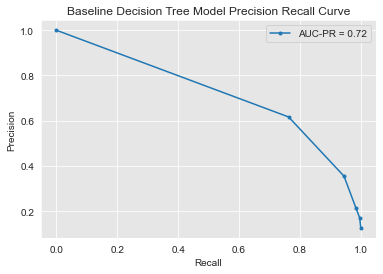

In [143]:
# Creating a Precision Recall Curve for the Tuned Decision Tree Model

plot_precision_recall_curve(X_train, X_test, y_train, y_test, best_pipe_clf_tune, title='Baseline Decision Tree Model Precision Recall Curve')

### Tuned Decision Tree Model | Conclusion

**Baseline Decision Tree Model**

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 100.0%
- Recall: 100.0%
- Accuracy: 100.0%
- F1 Score: 100.0%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 91.4%
- Recall: 91.7%
- Accuracy: 97.9%
- F1 Score: 91.6%

**Tuned Decision Tree Model**

When the tuned model utilizes the training data, the evaluation metrics are the following:

- Precision: 35.1%
- Recall: 95.0%
- Accuracy: 77.8%
- F1 Score: 51.3%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 34.9%
- Recall: 94.3%
- Accuracy: 77.1%
- F1 Score: 51.0%

**Conclusions**

Recall is the key model evaluation metric.  The Tuned Decision Tree Model outperforms the Baseline Decision Tree Model.  In addition, overfitting has been reduced with the Tuned Decision Tree Model.  

The Tuned Decision Tree model's evaluation metrics - precision, accuracy, and F1 - decreased relative to the Baseline Decision Tree Model's precision, accuracy, and F1 scores.  This is evidenced by the Tuned Decision Tree Model's ROC curve and precision-recall curve.  I consider the aforementioned relative decrease a trade-off.

The Tuned Decision Tree Model is the best model so far.

I will proceed with created another set of models via Random Forest algorithm.

## Baseline Random Forest Model

In [144]:
# Creating the Random Forest classifier, and fitting it on the training data

raf = RandomForestClassifier(criterion='entropy', random_state=42)

raf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [145]:
# Making predictions with the training data via Random Forest Classifier

y_hat_train_raf = raf.predict(X_train)

In [146]:
# Making predictions with the test data via Random Forest Classifier

y_hat_test_raf = raf.predict(X_test)

In [147]:
# Calculating Baseline Random Forest Model Metrics

evaluation_metrics(y_hat_train_raf, y_train, y_hat_test_raf, y_test)

Training Precision: 1.0
Testing Precision:  0.9813432835820896



Training Recall:  1.0
Testing Recall:  0.9669117647058824



Training Accuracy:  1.0
Testing Accuracy:  0.9935110081112398



Training F1-Score:  1.0
Testing F1-Score:  0.974074074074074


Confusion Matrix:
 [[3761   10]
 [  18  526]]


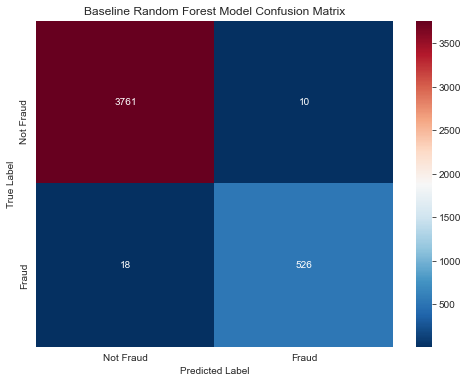

In [148]:
# Creating Confusion Matrix for the Baseline Random Forest Model

cnf_matrix_display(y_test, y_hat_test_raf, title='Baseline Random Forest Model Confusion Matrix')

AUC: 0.9995356883803641


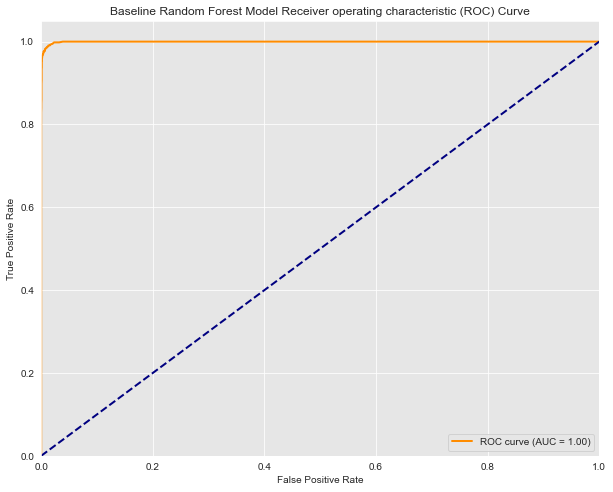

In [149]:
# Creating ROC curve for the Baseline Random Forest Model

plot_roc_curve(X_train, X_test, y_train, y_test, raf, title='Baseline Random Forest Model Receiver operating characteristic (ROC) Curve')

AUC-PR: 0.9969681946435429


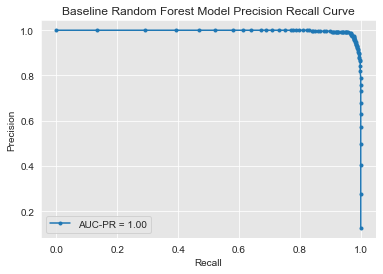

In [150]:
# Creating a Precision Recall Curve for the Baseline Decision Tree Model

plot_precision_recall_curve(X_train, X_test, y_train, y_test, raf, title='Baseline Random Forest Model Precision Recall Curve')

### Baseline Random Forest Model | Conclusion

I have concluded creating a Baseline Decision Tree model.

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 100.0%
- Recall: 100.0%
- Accuracy: 100.0%
- F1 Score: 100.0%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 95.5%
- Recall: 89.2%
- Accuracy: 98.1%
- F1 Score: 92.2%

This model has slight overfitting due to the discrepancies in the training and test metrics.

I am going to proceed by tuning the random forest model.

## Tuned Random Forest Model

There are multiple variables in which I want to tune the random forest model. I will currently focus on the following:

- Maximum Tree Depth (max_depth) - depth of the decision tree, the maximum number of splits a decision tree can have before continue to grow
- Minimum Sample Split (min_samples_split) - minimum number of samples required to split an internal node
- Minimum Sample Leafs (min_samples_leaf) - minimum number of samples for a leaf node, or terminal node
- Maximum Features (max_features) - maximum number of features considered for making a split at a tree node

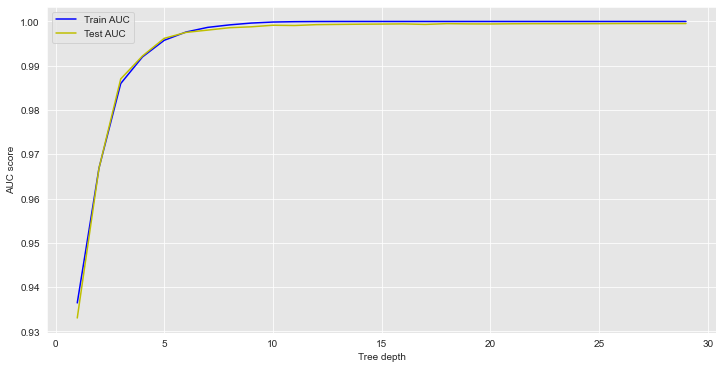

In [151]:
# Identifying Maximum Tree Depth for the Random Forest Model

identify_max_depth(X_train, X_test, y_train, y_test, RandomForestClassifier, criterion='entropy')

The optimal maximum tree depth is approximately 3.  After a tree depth of approximately 3, the AUC scores for the test and train data start to bifurcate.

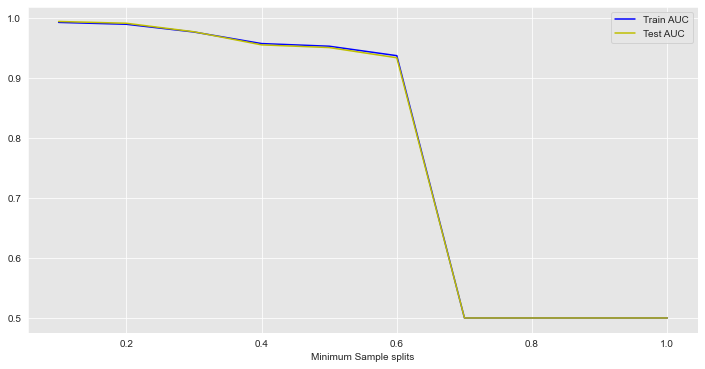

In [152]:
# Identifying Minimum Sample Split for the Random Forest Model

identify_min_samples_split(X_train, X_test, y_train, y_test, RandomForestClassifier, criterion='entropy')

The optimal minimum sample split is approximately 0.1.  After approximately 0.1, the AUC scores for the test and train data remain converged; however, the AUC scores for the train and test data decrease throughout the graph.

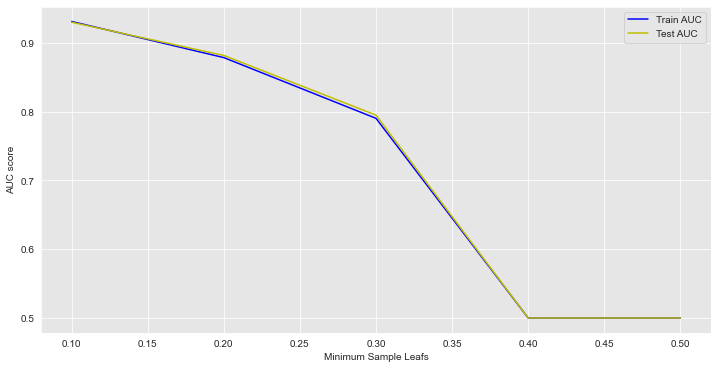

In [153]:
# Identifying Minimum Sample Leaf for the Random Forest Model

identify_min_samples_leaf(X_train, X_test, y_train, y_test, RandomForestClassifier, criterion='entropy')

The optimal minimum sample leaf is approximately 0.10.  The AUC scores for the training and test data are together throughout the graph; however, the AUC scores for the training and test data decreases.

In [154]:
# Identifying Maximum Features for the Random Forest Model

identify_max_features(X_train, X_test, y_train, y_test, RandomForestClassifier, criterion='entropy')

KeyboardInterrupt: 

There is no optimal maximum features identified in the graph.  The AUC scores for the training and test data are bifurcated throughout the graph.

I have found the approximate optimal values for Maximum Tree Depth, Minimum Sample Split, and Minimum Sample Leafs. I will create a pipeline and grid search cv that will not only incorporate the aforementioned values, but vary the Random Forest Model criterion and class weight.

In [ ]:
# Pipeline

# Creating a pipeline for tuning the Random Forest Model

steps_raf_tune = [('raf', RandomForestClassifier(random_state=42))]


pipe_raf_tune = Pipeline(steps_raf_tune) 

In [ ]:
# Creating Grid Search for tuning the Random Forest Model

# Set Grid for Search


params_raf_tune = [{'raf__max_depth': [1, 2, 3, 4, 5],
                     'raf__min_samples_split': [0.5, 0.6, 0.7, 0.8, 0.9],
                     'raf__min_samples_leaf': [0.25, 0.3, 0.35, 0.40],
                     'raf__criterion': ['entropy', 'gini'],
                     'raf__class_weight': [None, 'balanced']
                   }]

In [ ]:
# Instanstiate grid search object for tuning the Random Forest Model

grid_raf_tune = GridSearchCV(estimator=pipe_raf_tune, 
                          param_grid=params_raf_tune, 
                          scoring='recall', 
                          cv=5)

In [ ]:
# Fitting the grid search object to data and finding the best model

grid_raf_tune.fit(X_train, y_train)

best_pipe_raf_tune = grid_raf_tune.best_estimator_

In [ ]:
# Displaying the best parameters from the grid search object

print(grid_raf_tune.best_params_)

I have created the pipeline and grid search object. When I utilized the following code - grid_clf_tune.best_params_ - the optimal values are the following:

- class weight: balanced
- criterion: entropy
- maximum depth: 1
- minimum samples leaf: 0.25
- minimum samples split: 0.5

In [ ]:
# Predicting y-train with the Tuned Random Forest model

y_hat_train_raf_tune = best_pipe_raf_tune.predict(X_train)

In [ ]:
# Predicting y-test with Tuned Random Forest model

y_hat_test_raf_tune = best_pipe_raf_tune.predict(X_test)

In [ ]:
# Evaulation metrics for Tuned Random Forest Model

evaluation_metrics(y_hat_train_raf_tune, y_train, y_hat_test_raf_tune, y_test)

In [ ]:
# Creating Confusion Marix for the Tuned Random Forest Model

cnf_matrix_display(y_test, y_hat_test_raf_tune, title='Confusion Matrix for Tuned Random Forest Model')

In [ ]:
# Creating ROC curve for the Tuned Random Forest Model

plot_roc_curve(X_train, X_test, y_train, y_test, best_pipe_raf_tune, title='Tuned Random Forest Model Receiver operating characteristic (ROC) Curve')

In [ ]:
# Creating a Precision Recall Curve for the Tuned Random Forest Model

plot_precision_recall_curve(X_train, X_test, y_train, y_test, best_pipe_raf_tune, title='Tuned Random Forest Model Precision Recall Curve')

### Tuned Random Forest Model | Conclusion

**Baseline Random Forest Model**

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 100.0%
- Recall: 100.0%
- Accuracy: 100.0%
- F1 Score: 100.0%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 95.5%
- Recall: 89.2%
- Accuracy: 98.1%
- F1 Score: 92.2%

**Tuned Random Forest Model**

When the tuned model utilizes the training data, the evaluation metrics are the following:

- Precision: 30.2%
- Recall: 76.7%
- Accuracy: 75.3%
- F1 Score: 43.3%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 31.4%
- Recall: 77.6%
- Accuracy: 75.8%
- F1 Score: 44.7%

**Conclusions**

The Tuned Random Forest Model minimized the overfitting.  However, the Baseline Random Forest Model outperforms the Tuned Random Forest Model.  As a reminder, recall is the key model evaluation metric.

I will proceed with created another set of models via Gradient Boosting algorithm.

## Baseline Gradient Boosting Model

In [ ]:
# Creating the Baseline Gradient Boosting classifier, and fitting it on the training data

gdb = GradientBoostingClassifier(criterion='friedman_mse', random_state=42)

gdb.fit(X_train, y_train)

In [ ]:
# Making predictions with the training data via Baseline Gradient Boosting Classifier

y_hat_train_gdb = gdb.predict(X_train)

In [ ]:
# Generating Predictions for X-Test, or test data, via Baseline Gradient Boosting Classifier

y_hat_test_gdb = gdb.predict(X_test) 

In [ ]:
# Calculating Baseline Gradient Boosting Model Metrics

evaluation_metrics(y_hat_train_gdb, y_train, y_hat_test_gdb, y_test)

In [ ]:
# Creating Confusion Matrix for the Baseline Gradient Boosting Model

cnf_matrix_display(y_test, y_hat_test_gdb, title='Baseline Gradient Boosting Model Confusion Matrix')

In [ ]:
# Creating ROC curve for the Baseline Gradient Boosting Model

plot_roc_curve(X_train, X_test, y_train, y_test, gdb, title='Baseline Gradient Boosting Model Receiver operating characteristic (ROC) Curve')

In [ ]:
# Creating a Precision Recall Curve for the Baseline Gradient Boosting Model

plot_precision_recall_curve(X_train, X_test, y_train, y_test, gdb, title='Baseline Gradient Boosting Model Precision Recall Curve')

### Baseline Gradient Boosting Model

I have concluded creating the Baseline Gradient Boosting Model.

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 96.2%
- Recall: 91.1%
- Accuracy: 98.5%
- F1 Score: 93.6%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 94.6%
- Recall: 89.3%
- Accuracy: 98.0%
- F1 Score: 91.9%

There is minimal overfitting with this model.

I will proceed with tuning the Gradient Boosting Model.

## Tuning Gradient Boosting Model

There are multiple variables in which I want to tune the random forest model. I will currently focus on the following:

- Maximum Tree Depth (max_depth) - depth of the decision tree, the maximum number of splits a decision tree can have before continue to grow
- Minimum Sample Split (min_samples_split) - minimum number of samples required to split an internal node
- Minimum Sample Leafs (min_samples_leaf) - minimum number of samples for a leaf node, or terminal node
- Maximum Features (max_features) - maximum number of features considered for making a split at a tree node

In [ ]:
# Identifying Maximum Tree Depth for the Gradient Boosting Model

identify_max_depth(X_train, X_test, y_train, y_test, GradientBoostingClassifier, criterion='friedman_mse')

The optimal maximum tree depth is approximately 2.  After a tree depth of 2, the AUC scores of the test data and training data start to bifurcate.

In [ ]:
# Identifying Minimum Sample Split for the Gradient Boosting Model

identify_min_samples_split(X_train, X_test, y_train, y_test, GradientBoostingClassifier, criterion='friedman_mse')

There is no optimal minimum sample split identified.  The AUC scores for the training data and test data are bifurcated throughout the graph.

In [ ]:
# Identifying Minimum Sample Leaf for the Gradient Boosting Model

identify_min_samples_leaf(X_train, X_test, y_train, y_test, GradientBoostingClassifier, criterion='friedman_mse')

The optimal minimum sample leaf is approximately 0.10.  As the number of minimum sample leafs increase via the graph, the AUC scores for the training data and test data move together.  However, the scores for the training data and test data decreases.

In [ ]:
# Identifying Maximum Features for the Gradient Boosting Model

identify_max_features(X_train, X_test, y_train, y_test, GradientBoostingClassifier, criterion='friedman_mse')

There is no optimal maximum features identified.  Throughout the graph, the AUC scores for the training and test data are bifurcated.

I have found the approximate optimal values for Maximum Tree Depth and Minimum Sample Leaf. I will create a pipeline and grid search cv that will not only incorporate the aforementioned values, but vary the Gradient Boosting Model criterion, loss, learning rate, and minimum weight fraction leaf.

In [ ]:
# Pipeline

# Creating a pipeline for tuning the Random Forest Model

steps_gdb_tune = [('gdb', GradientBoostingClassifier(random_state=42))]


pipe_gdb_tune = Pipeline(steps_gdb_tune) 

In [ ]:
# Creating Grid Search for tuning the Random Forest Model

# Set Grid for Search


params_gdb_tune = [{'gdb__max_depth': [1, 2, 3, 4],
                     'gdb__min_samples_leaf': [0.05, 0.10, 0.15, 0.20],
                     'gdb__criterion': ['friedman_mse', 'squared_error'],
                     'gdb__loss': ['log_loss', 'exponential'],
                     'gdb__learning_rate': [0.1, 0.2],
                     'gdb__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
                   }]

In [ ]:
# Instanstiate grid search object for tuning the Random Forest Model

grid_gdb_tune = GridSearchCV(estimator=pipe_gdb_tune, 
                          param_grid=params_gdb_tune, 
                          scoring='recall', 
                          cv=5)

In [ ]:
# Fitting the grid search object to data and finding the best model

grid_gdb_tune.fit(X_train, y_train)

best_pipe_gdb_tune = grid_gdb_tune.best_estimator_

In [ ]:
# Displaying the best parameters from the grid search object

print(grid_gdb_tune.best_params_)

I have created the pipeline and grid search object. When I utilized the following code - grid_gdb_tune.best_params_ - the optimal values are the following:

- criterion: friedman mse
- learning rate: 0.2
- loss: log loss
- maximum depth: 4
- minimum sample leaf: 0.05
- minimum weight fraction: 0.0

In [ ]:
# Predicting y-train with the Tuned Gradient Boosting model

y_hat_train_gdb_tune = best_pipe_gdb_tune.predict(X_train)

In [ ]:
# Predicting y-test with Tuned Gradient Boosting model

y_hat_test_gdb_tune = best_pipe_gdb_tune.predict(X_test)

In [ ]:
# Evaulation metrics for the Tuned Gradient Boosting Model

evaluation_metrics(y_hat_train_gdb_tune, y_train, y_hat_test_gdb_tune, y_test)

In [ ]:
# Creating Confusion Marix for the Tuned Gradient Boosting Model

cnf_matrix_display(y_test, y_hat_test_gdb_tune, title='Confusion Matrix for Tuned Gradient Boosting Model')

In [ ]:
# Creating ROC curve for the Tuned Random Forest Model

plot_roc_curve(X_train, X_test, y_train, y_test, best_pipe_gdb_tune, title='Tuned Gradient Boosting Model Receiver operating characteristic (ROC) Curve')

In [ ]:
# Creating a Precision Recall Curve for the Gradient Boosting Model

plot_precision_recall_curve(X_train, X_test, y_train, y_test, best_pipe_gdb_tune, title='Tuned Gradient Boosting Model Precision Recall Curve')

### Tuned Gradient Boosting Model | Conclusion

**Baseline Gradient Boosting Model**

When the baseline model utilizes the training data, the evaluation metrics are the following:
    
- Precision: 96.2%
- Recall: 91.1%
- Accuracy: 98.5%
- F1 Score: 93.6%
    
When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 94.6%
- Recall: 89.3%
- Accuracy: 98.0%
- F1 Score: 91.9%
    
**Tuned Gradient Boosting Model**

When the tuned model utilizes the training data, the evaluation metrics are the following:

- Precision: 95.4%
- Recall: 92.9%
- Accuracy: 98.6%
- F1 Score: 94.1%
    
When the tuned model utilizes the test data, the evaluation metrics are the following:
    
- Precision: 92.5%
- Recall: 91.0%
- Accuracy: 97.9%
- F1 Score: 91.7%

**Conclusions**

There is minimal overfitting with the Tuned Gradient Boosting Model.  In addition, the Tuned Grading Boosting Model performs better than the Baseline Gradient Boosting Model.  

## Modeling | Conclusion

The key model evaluation metric is recall.  The recall values for each of the models are the following:

- Baseline Decision Tree Model (91.7%)
- Tuned Decision Tree Model (94.3%)
- Baseline Random Forest Model (89.2%)
- Tuned Random Forest Model (77.6%)
- Baseline Gradient Boosting Model (89.3%)
- Tuned Gradient Boosting Model (92.9%)

Since the key model evaluation metric is recall, the Tuned Decision Tree Model performs the best.

I will proceed by identifying which features, or characteristics, are the most important for the Tuned Decision Tree Model.

## Feature Importance of the Tuned Decision Tree Model

In [ ]:
# Recreating the Tuned Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

tuned_decision_tree_model = DecisionTreeClassifier(random_state=42,
                                                   class_weight='balanced',
                                                   criterion='entropy',
                                                   max_depth=3,
                                                   min_samples_leaf=0.15,
                                                   min_samples_split=0.1)


# Fitting Tuned Decision Tree Model to the data

tuned_decision_tree_model.fit(X_train, y_train)

In [ ]:
# Understanding which features, or columns, are most important in the Tuned Decision Tree Model

# Access feature importances

feature_importances = tuned_decision_tree_model.feature_importances_ 


for feature, importance in zip(X_train.columns, feature_importances):

    print(feature, ": ", importance)

I utilized the following code - *feature_importances_* - to identify which features are most important in the Tuned Decision Tree Model.

Transaction Amount has a (importance) score of 0.867.  And Month has a (importance) score of 0.133.

The bar graph below displays the breakdown of the feature importance scores.

In [ ]:
# Displaying which features, or columns, are most important in the Updated Decision Tree Model via Bar Graph

sort = tuned_decision_tree_model.feature_importances_.argsort()

plt.xlabel("Feature Importance")

plt.barh(X_train.columns[sort], tuned_decision_tree_model.feature_importances_[sort])

plt.title("Breakdown of Feature Importance Scores for Transaction Column")

### Transaction Amount vs. Fraud

In [ ]:
fraud_df['amt'].describe()

I utilized the following code - *fraud_df['amt'].describe()* - to re-examine the Credit Card Transaction Amount column.  More importantly, I wanted to see how the data is distributed.

The data is positively skewed.  This is evidenced by the mean, or approximately 122.71, being greater than the median, or approximatley 51.29.  I created a histogram below in order to visualize the positive skew.

In [ ]:
# Creating a histogram of the (Credit Card Transaction) Amount Column

fraud_df['amt'].hist(bins=100)

plt.xlabel('Credit Card Transaction Amount')
plt.ylabel('Credit Card Transaction Count')
plt.title("Histogram of Credit Card Transaction Amount")

I want to explore importance of Transactions within the Decision Tree Model and dataframe as a whole.  I will start by creating a new column that create bins for the *fraud_df['amt']* column.  The new column will be Amount Breakdown, or *fraud_df['amt_breakdown']*.  The breakdown of the bins are the following:

- 0 to 249.99
- 250 to 499.99
- 500 to 749.99
- 750 to 999.99
- 1000 to 1249.99
- 1250 to 1499.99
- 1500 to 1749.99
- 1750 to 1999.99
- 2000 to 2249.99
- 2250 to 2499.99
- 2500 to 2749.99
- 2750 to 2999.99
- 3000 to 3249.99
- 3250 to 3499.99

In [ ]:
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500] 

labels = ['0 to 249.99', '250 to 499.99', '500 to 749.99', '750 to 999.99', '1000 to 1249.99', 
          '1250 to 1499.99', '1500 to 1749.99', '1750 to 1999.99', '2000 to 2249.99', '2250 to 2499.99', '2500 to 2749.99',
          '2750 to 2999.99', '3000 to 3249.99', '3250 to 3499.99'] 

fraud_df['amt_breakdown'] = pd.cut(fraud_df['amt'], bins=bins, labels=labels)

In [ ]:
# Counting the number of transactions per 'Amount' Bin

transaction_counts_each_bin = fraud_df.groupby('amt_breakdown').size()

print(transaction_counts_each_bin)

In [ ]:
# Calculating the percentile of fradulent transactions in each 'Amount' bin

fraud_counts = fraud_df.groupby('amt_breakdown')['is_fraud'].mean()

print(fraud_counts)

In [ ]:
# Plotting 'Amount (breakdown)' against 'Fraud'

ax = sns.barplot(x='is_fraud', y='amt_breakdown', data=fraud_df, ci=None)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically
    
plt.title("Transaction Amount against Fraud")

In [ ]:
# Plotting the initial 'Amount' bins against 'Fraud'

# Define the initial 6 segments

initial_segments = fraud_df['amt_breakdown'].cat.categories[:6]


# Filter the DataFrame to include only the initial 6 segments

filtered_df = fraud_df[fraud_df['amt_breakdown'].isin(initial_segments)].copy()


# Adjust the category levels to include only the initial segments

filtered_df['amt_breakdown'] = filtered_df['amt_breakdown'].cat.remove_unused_categories()


# Plotting the filtered data

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='is_fraud', y='amt_breakdown', data=filtered_df, ci=None)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Transaction Amount against Fraud (Initial 6 Segments)")
plt.xlabel("Proportion of Fraud")
plt.ylabel("Amount Range")
plt.show()

I created two graphs - 1) *Transaction Amount against Fraud*, 2) *Transaction Amount against Fraud (Initial 6 Segments)* - to understand the bins in which fraud takes place the most.

The following two bins - 1) 750 to 999.99, and 2) 1000 to 1249.99 - have scores of 0.96.  The interpretation is that 96% of the transactions in the aforementioned bins are fradulent.

My initial reaction is that credit card transactions within these segmentations need increased security protocols.

# Overall Conclusion and Recommendations

Credit card fraud is increasing year over year.  The number of attempts is approximately increasing by 46% year-over-year.  In the US, credit card losses are projected to reach $12.5 billion by 2025.

As a result, it is paramount for any business - existing or newcomers - to have a strategy and proactive approach for confronting this deceptive practice.

## Overall Conclusion

I created a total of six models in order to detect credit card fraud.  The models and their respective recall scores are below:
    
- Baseline Decision Tree Model (91.7%)
- Tuned Decision Tree Model (94.3%)
- Baseline Random Forest Model (89.2%)
- Tuned Random Forest Model (77.6%)
- Baseline Gradient Boosting Model (89.3%)
- Tuned Gradient Boosting Model (92.9%)

The Tuned Decision Tree Model performed the best.

As a follow-up, I examined which columns, or features, are the most important for the Tuned Decision Tree Model.  Credit card transaction amount is the most important feature of the Tuned Decision Tree Model.

I created a new column to further examine credit card transaction amount as a feature.  Within the new column, I created bins to break down the credit card transaction amounts into various segmentations.

96% of the credit card transactions in the following two bins - 1) 750 to 999.99, and 2) 1000 to 1249.99 - are fradulent.

## Recommendations

Recommendations and next steps are the following:
    
**1. Additional Data**

The dataset to create the credit card fraud detection model is only composed of the Western United States.  As due diligence, data needs to be collected for the Eastern United States.

The dataset only contained credit card transactions for the years 2020 and 2021.  Data needs to be collected for subsequent years in order to further refine the model.

**2. Operations Management**

In regards to hours, credit card fraud cases are the most numerous as midnight approaches.

In regards to months, credit card fraud cases peak in the month of January.

Addressing credit card fraud encompasses manual labor.  This entails, but not limited to, receiving potential credit card fraud inquiries by phone and investigation.  Line balancing - a production strategy concept that is utilized production for an assembly line - can be utilized here.

Pending its entrance into the credit card business, the respective financial services company can increase the number of employees around midnight and the month of January.

**3. Security Protocols**

Increase security protocols can help address credit card fraud.  As cited earlier, 96% of credit card transactions in the following segments - 1) 750 to 999.99, and 2) 1000 to 1249.99 - are fradulent.  

As an example, single-factor authentication (SFA) only requires one form of identification such as a password.  For credit card transactions in the aforementioned segments, multi-factor authentication (MFA) can be employed.  The credit card holder does not only provide a password or pin, but the credit card holder has to adhere to another level of security.  This entails, but not limited to, a text message sent to the credit card holder's smartphone, fingerprint, facial recognition, and/or voice pattern.